In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats
from imblearn.under_sampling import RandomUnderSampler
#from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, mutual_info_classif, f_classif,f_regression,mutual_info_regression, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,auc,roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
#import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, mutual_info_classif, f_classif, f_regression, mutual_info_regression, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.calibration import calibration_curve


import warnings
warnings.filterwarnings('ignore')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, mutual_info_classif, f_classif, f_regression, mutual_info_regression, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, mutual_info_classif, f_classif, f_regression, mutual_info_regression, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.calibration import calibration_curve


In [320]:
#Reading the dataset
df = pd.read_csv('heartDiseaseDataset.csv')

In [321]:
#checking data types of features of the datasetm and if any null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [322]:
df.sample(10)

HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  \
16388                      0       1         1          1   32       0   
157498                     0       1         0          1   27       1   
81907                      0       0         0          1   40       1   
15230                      1       1         1          1   24       1   
145391                     0       1         1          1   28       1   
78299                      0       0         0          1   24       0   
187901                     0       0         0          1   24       0   
180351                     0       1         1          1   39       0   
84497                      0       1         1          1   34       0   
241710                     0       0         0          1   28       1   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
16388        0         2             1       0  ...              1   
157498       0         2             1       1  ...              0   
81907        0         0             1       1  ...              1   
15230        0         2             1       1  ...              1   
145391       0         0             0       1  ...              1   
78299        0         0             1       0  ...              1   
187901       0         0             1       0  ...              1   
180351       0         2             1       0  ...              1   
84497        0         0             0       1  ...              1   
241710       0         0             1       0  ...              1   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
16388             0        2         0         0         0    1    2   
157498            0        4        10         1         0    1    6   
81907             0        3         5         5         0    1    9   
15230             0        5         0         3         1    0   12   
145391            0        2         0        10         1    1   10   
78299             0        1         0         0         0    1    3   
187901            1        3         0         0         0    0    9   
180351            0        3         0         0         1    0   12   
84497             1        4         5        10         1    0   10   
241710            1        4         7         0         0    1    2   

        Education  Income  
16388           5       7  
157498          4       3  
81907           6       8  
15230           4       6  
145391          6       8  
78299           5       8  
187901          4       7  
180351          4       6  
84497           4       2  
241710          5       4  

[10 rows x 22 columns]

In [323]:
#checking for null values

In [324]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [325]:
#function to reset index
def resetIndex():
    df_no_outliers.reset_index(drop=True, inplace=True)
    df_bal.reset_index(drop=True, inplace=True)
    

In [326]:
#checking the counts of unique instances in a given target column
def checkUniq(dataFrame,target):
        
    #the number of unique instances in the target column
    num_unique_values = dataFrame[target].nunique()
    
    #the count of each unique instance in the target column
    value_counts = dataFrame[target].value_counts()

    print("Number of unique values in, ",target,":", num_unique_values)
    print("Value counts:")
    print(value_counts)

In [327]:
#function to print bar graph, takes dataframe and features to be plotted as parameters
def plotBar(df,features):
    plt.figure(figsize=(15,40))
    for i,column in enumerate(features):
        plt.subplot(len(features), 2, i+1)
        plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
        sns.countplot(data=df, x=column)
        plt.title(f"{column}")
        plt.tight_layout()

In [328]:
#function to print histogram, takes dataframe and features to be plotted as parameters
def plotBarNC(df,features):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    sns.histplot(data=df, x=features[0], ax=axes[0])
    sns.histplot(data=df, x=features[1], ax=axes[1])
    sns.histplot(data=df, x=features[2], ax=axes[2])

In [329]:
#function to print box plot
def boxPlott(df):
    ax = sns.boxplot(data=df)
    plt.title("Box Plot for Outliers")

    # Rotating x-axis labels to make them readable
    plt.xticks(rotation=70)  
    plt.show()

In [330]:
#functions to test out testting accuracy of models
def testReg_scal(testSet,scalar,model):
    target='HeartDiseaseorAttack'
    X=testSet.drop(target, axis=1)
    X=scalar.transform(X)
    y_pred = model.predict(X)
    actual=testSet[target].values
    correct=0
    for i in range(len(actual)):
        if actual[i]==y_pred[i]:
            correct +=1;
    print('Accuracy on test set')
    print(correct/len(actual))
    
def testThres_scal(df,model,scaler,threshold=0.5):    
    X=df.drop(target,axis=1)
    X=scaler.transform(X)
    y_pred_prob=model.predict_proba(X)[:,1]
    y_pred=(y_pred_prob >= threshold).astype(int)
    actual=df[target].values
    correct=0
    for i in range(len(actual)):
        if actual[i]==y_pred[i]:
            correct+=1
    print('Test Accuracy',correct/len(actual))
    
    
def testReg_noScal(df,model):    
    X=df.drop(target,axis=1)
    y_pred=model.predict(X)
    actual=df[target].values
    correct=0
    for i in range(len(actual)):
        if actual[i]==y_pred[i]:
            correct+=1
    print('Test Accuracy',correct/len(actual))
    
def testThres(df,model,threshold=0.5):    
    X=df.drop(target,axis=1)
    y_pred_prob=model.predict_proba(X)[:,1]
    y_pred=(y_pred_prob >= threshold).astype(int)
    actual=df[target].values
    correct=0
    for i in range(len(actual)):
        if actual[i]==y_pred[i]:
            correct+=1
    print('Test Accuracy',correct/len(actual))

In [331]:
categoricalFeatures=['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex','Age', 'Education',
       'Income']

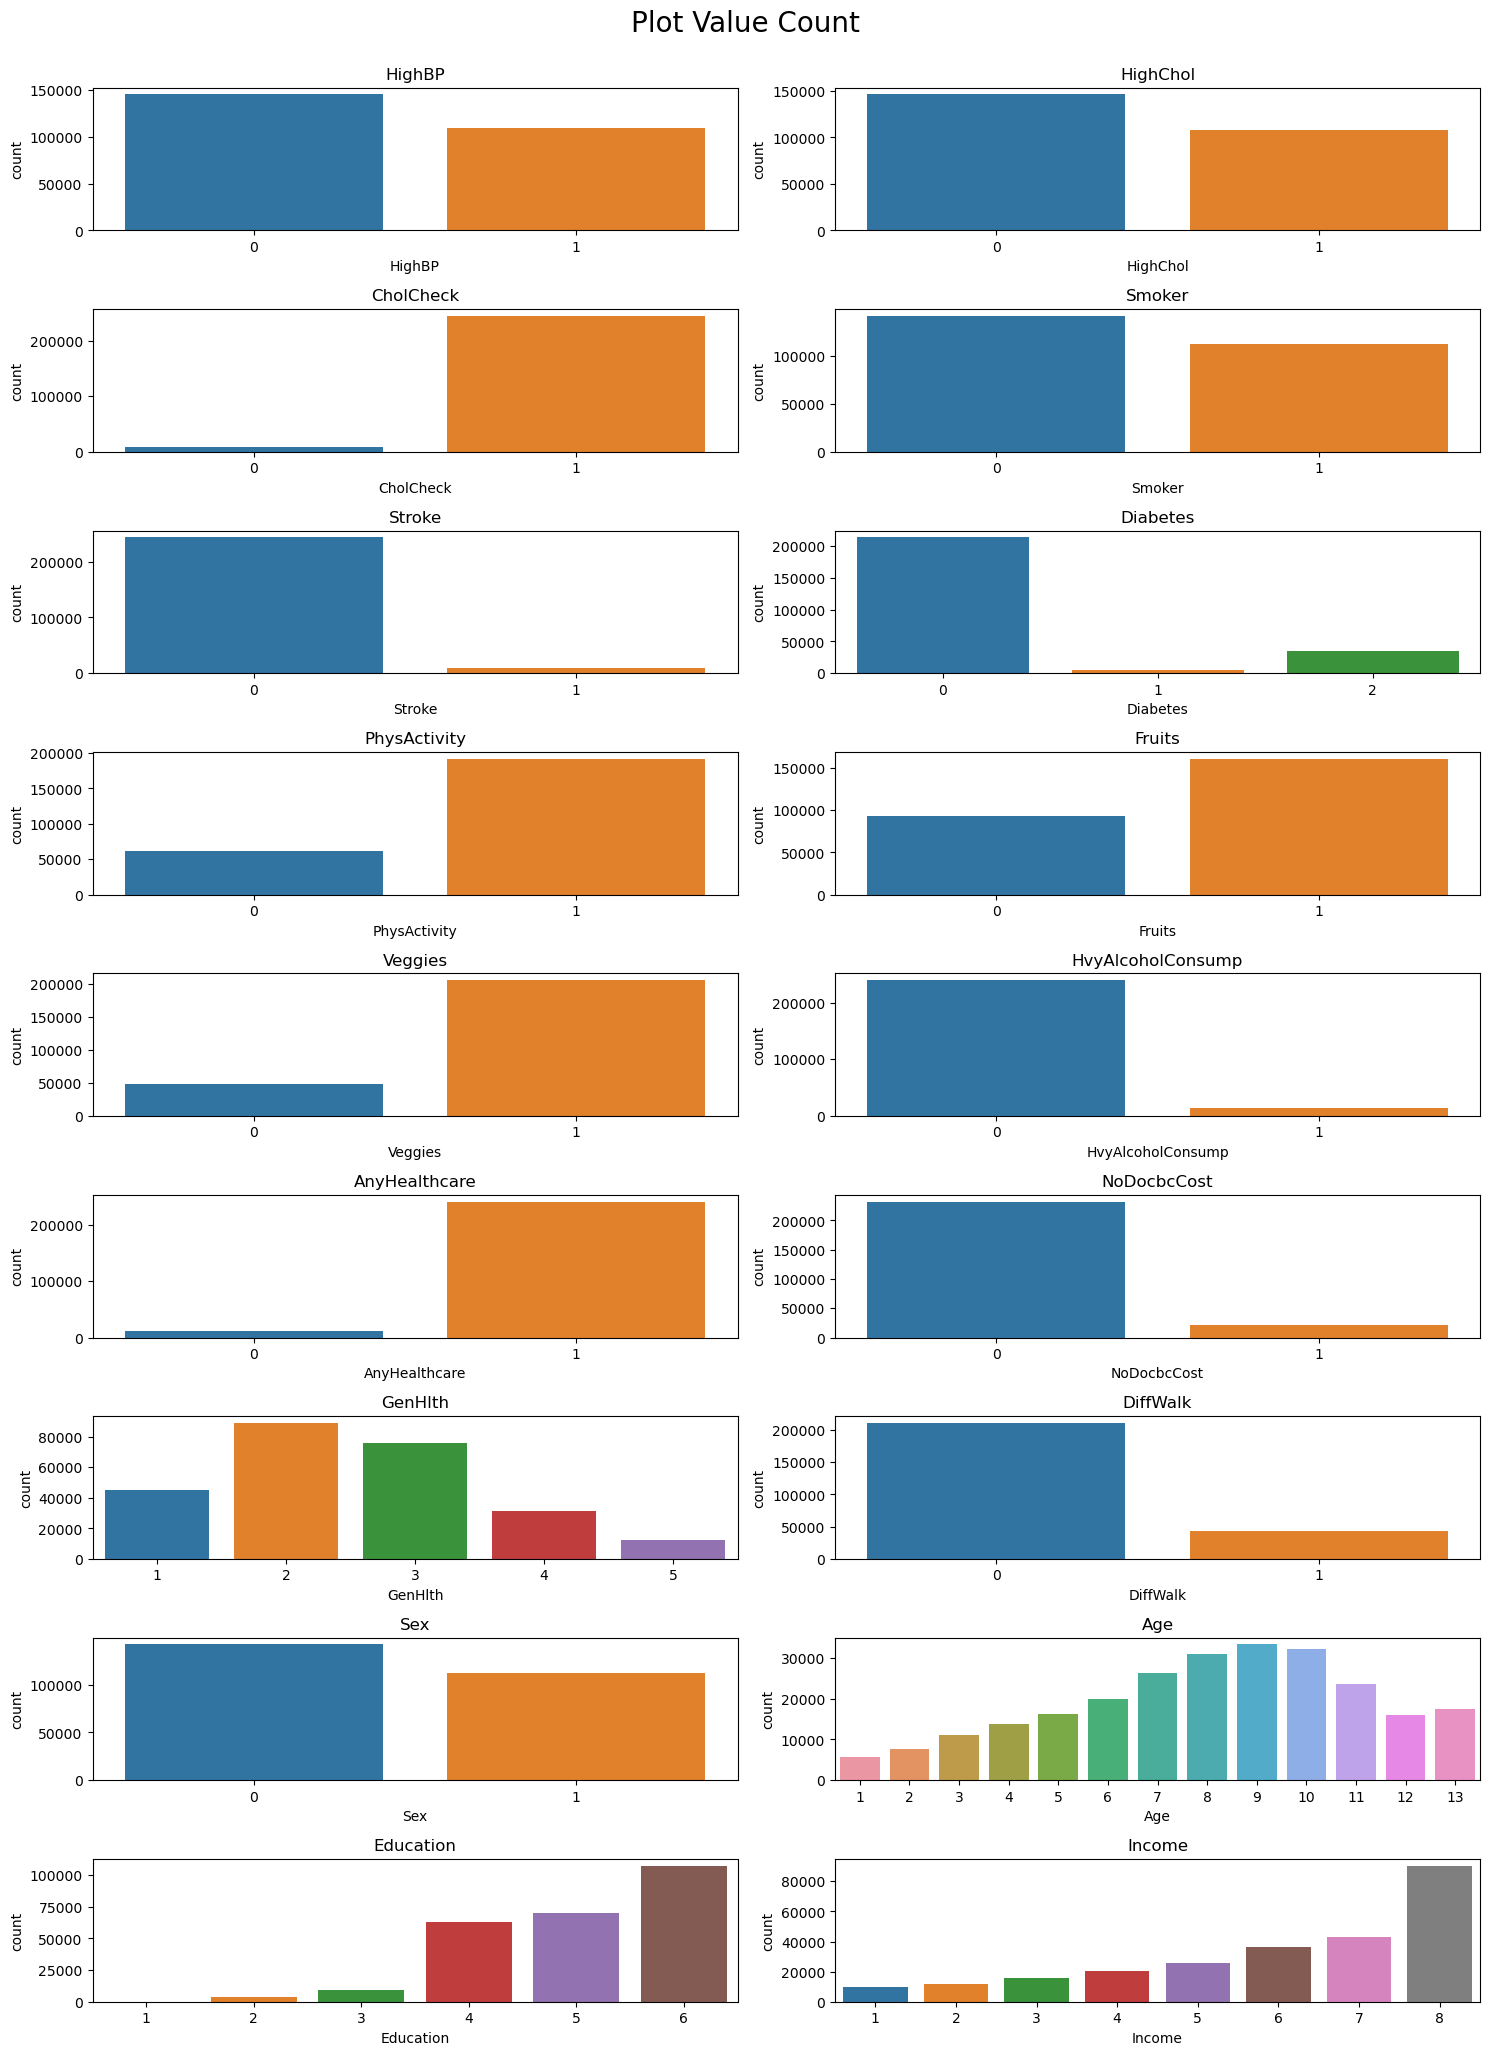

In [332]:
plotBar(df,categoricalFeatures)

In [333]:
#INSIGHTS
#the features ColChk, Stroke, Diabetes, PhysActivity, Veggies, HvyAlcholConsup, AnyHealthcare, NoDocbcCost, are heavily imbalanced
# Since these columns are not our target column, their imbalance could, provide valuable information in training our models,
# and help in being able to predict unique/real world instances of data

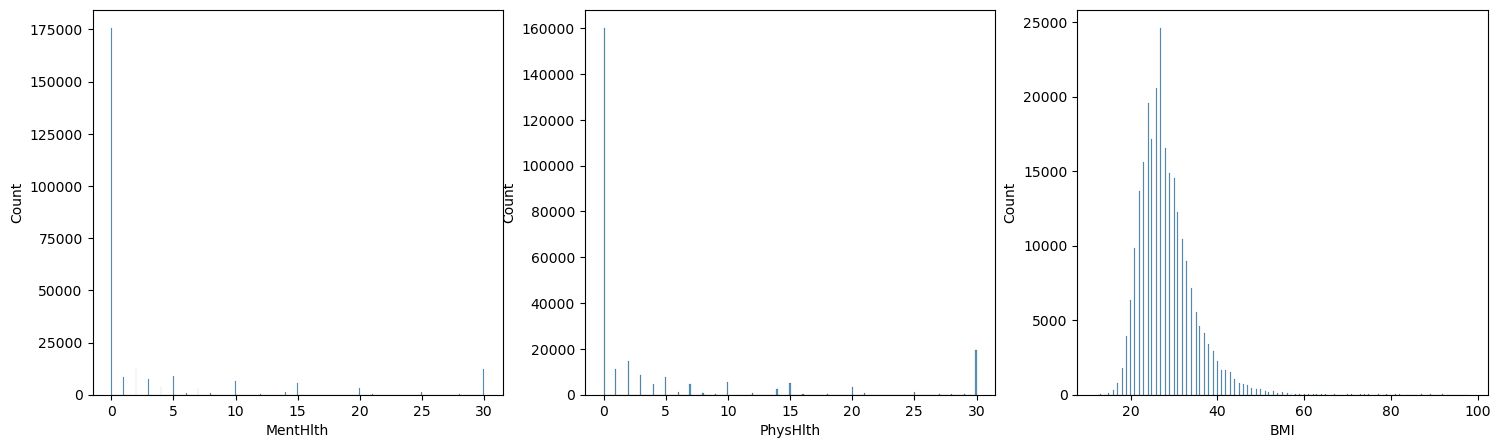

In [334]:
nonCatCol = ['MentHlth', 'PhysHlth', 'BMI']
plotBarNC(df,nonCatCol)

In [335]:
#INSIGHTS
#the MentHlth and PhysHlth columns have most of their values at 0 which leads us to believe that most have
# either a bad physics health or a bad mental health and not both as the BMI shows the pattern of a normal distribution,
# peaking around 30, which is a very minutely above the optimal (BMI:18-24), allowing us to believe that the majority
# are in good physical health.

<h1>preprocessing begins

In [336]:
checkUniq(df,'HeartDiseaseorAttack')

Number of unique values in,  HeartDiseaseorAttack : 2
Value counts:
0    229787
1     23893
Name: HeartDiseaseorAttack, dtype: int64


In [337]:
# the dataset's target variable is heavily imbalanced and will need to be stratified, to have equal amounts
# of each class simultaneoulsy while not losing out on patterns in other features.

In [338]:
#since the target class is unbalanced we will use a random undersampler
#to get a balanced target class distribution

#random sample instance is created with a defined random state to enable reproducability 
randSamp=RandomUnderSampler(random_state=42)

#the target variable hold the value of target column
target='HeartDiseaseorAttack'

#the variable df_X holds the entire dataset except the target column
df_X=df.drop(target,axis=1)

# the variable df_Y holds only the target column
df_Y=df[target]

#running the random samlper
df_X,df_Y=randSamp.fit_resample(df_X,df_Y)

#concatenating df_X and df_Y into df_bal which holds the balanced dataset
df_bal=pd.concat([df_X,df_Y],axis=1)

In [339]:
#the dataset is now balanced
checkUniq(df_bal,target)

Number of unique values in,  HeartDiseaseorAttack : 2
Value counts:
0    23893
1    23893
Name: HeartDiseaseorAttack, dtype: int64


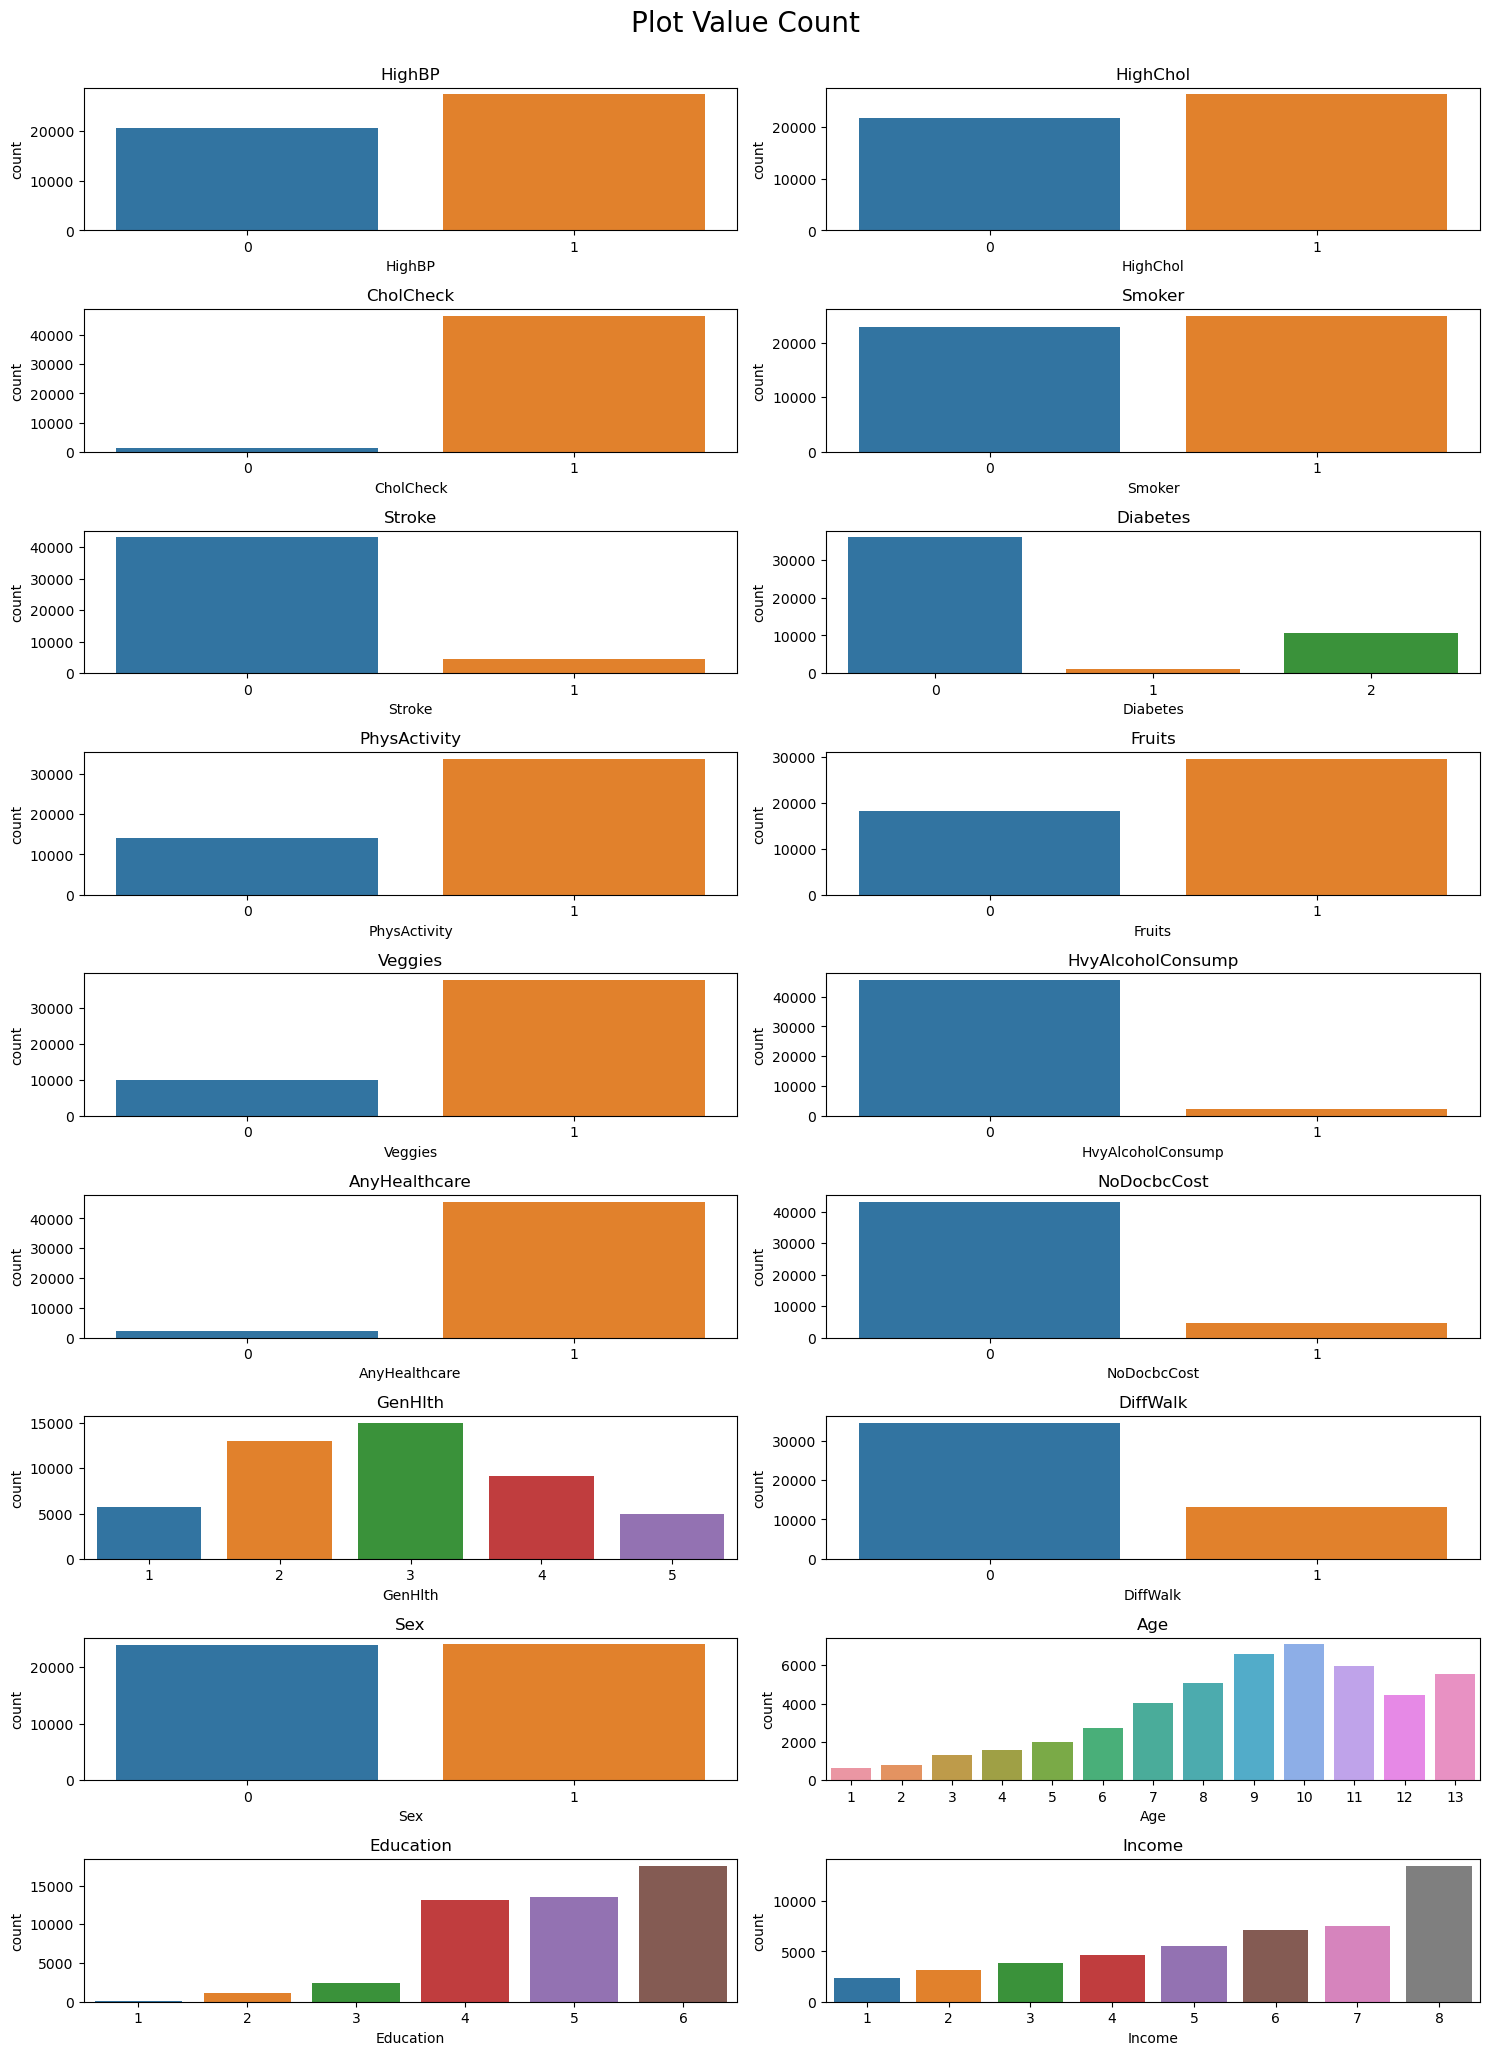

In [340]:
plotBar(df_bal,categoricalFeatures)

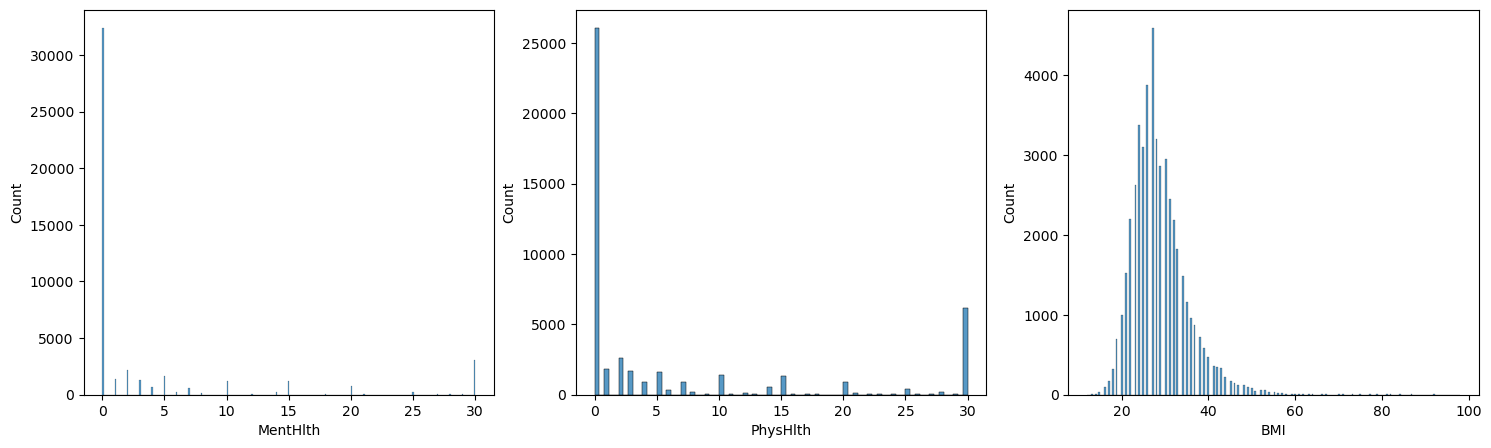

In [341]:
plotBarNC(df_bal,nonCatCol)

In [342]:
#as we can see, the undersampling, has taken the target class values in equal proportion such that, 
# it hasn't disrupted order of other features

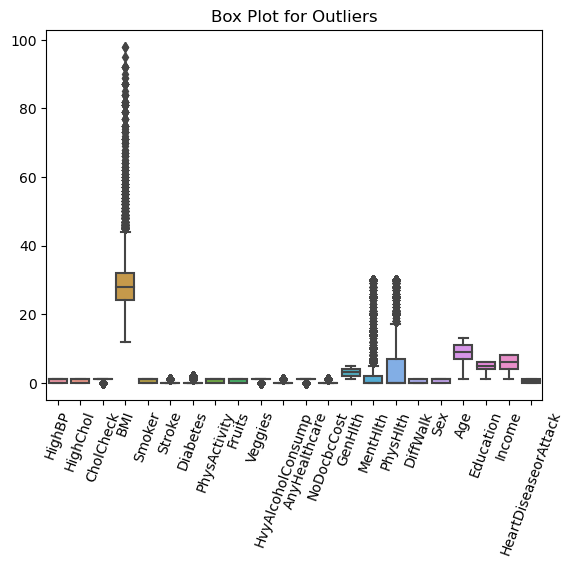

In [343]:
#checking for outliers
boxPlott(df_bal)

In [344]:
# there are a significant number of outliers which are present for BMI, MentHlth, PhysHlth, which might disrupt the 
# training of the model, and will hence need to be dealt with

In [345]:
#removing outliers that fall outside the end whiskers for BMI, MentHlth, PhysHlth

outlierColumns = ['BMI', 'MentHlth', 'PhysHlth']

# Calculating Q1, Q3, and IQR for the specified columns
Q1 = df_bal[outlierColumns].quantile(0.25)
Q3 = df_bal[outlierColumns].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating a mask to identify rows with outliers
outlier_mask = ~((df_bal[outlierColumns] < lower_bound) | (df_bal[outlierColumns] > upper_bound)).any(axis=1)

# Removing outliers by filtering the DataFrame and storing in variable 'df_no_outliers'
df_no_outliers = df_bal[outlier_mask]


In [346]:
resetIndex()

In [347]:
# def outLine(df):
#     outlierIndex = []
#     outlierColumns = ['BMI', 'MentHlth', 'PhysHlth']
#     for col in outlierColumns:
#         # gets mean of the column
#         mean = df[col].mean()
        
#         # gets standard deviation of the column
#         std = df[col].std()
        
#         # calculates Z score of the column
#         zScore = (df[col] - mean) / std
#         outliers = []
#         for idx, num in enumerate(zScore):
#             if num > 3 or num < -3:
                
#                 # Appends the index of the outlier to the list
#                 outliers.append(idx)  
                
#         # stores index of outliers
#         outlierIndex.extend(outliers)
#         print(col, 'has', len(outliers), 'outliers')
#     return outlierIndex

In [348]:
# #removing outliers from dataset
# i = 0
# print('ite', i)
# outliersIndex = outLine(df_no_outliers)
# print(len(outliersIndex))
# while len(outliersIndex) != 0:
#     df_no_outliers.drop(index=outliersIndex, inplace=True)
#     df_no_outliers.reset_index(drop=True, inplace=True)
#     outliersIndex = outLine(df_no_outliers)
#     if len(outliersIndex) != 0:
#         i += 1
#         print('ite', i)


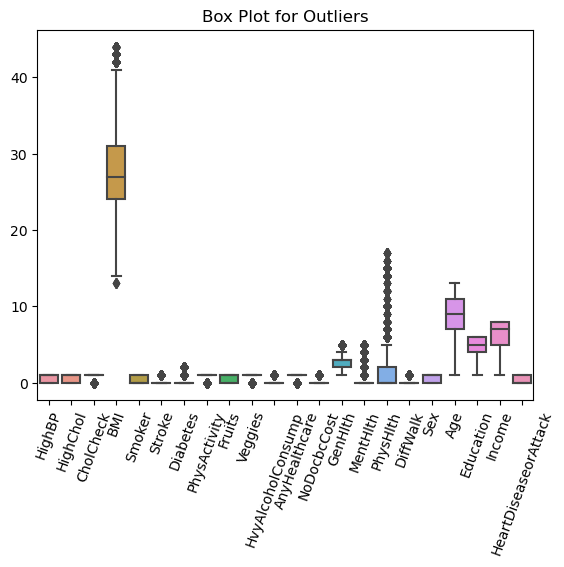

In [349]:
boxPlott(df_no_outliers)

In [350]:
#in the above box plot after removing outlier once, there still appear to be some
# outliers but, they aren't outliers when compared to the whole dataset, this ouccures
# due to recalculation of IQR ranges, after deletion of outliers from the first iteration
#hence these outliers contain valuable information for ML model training

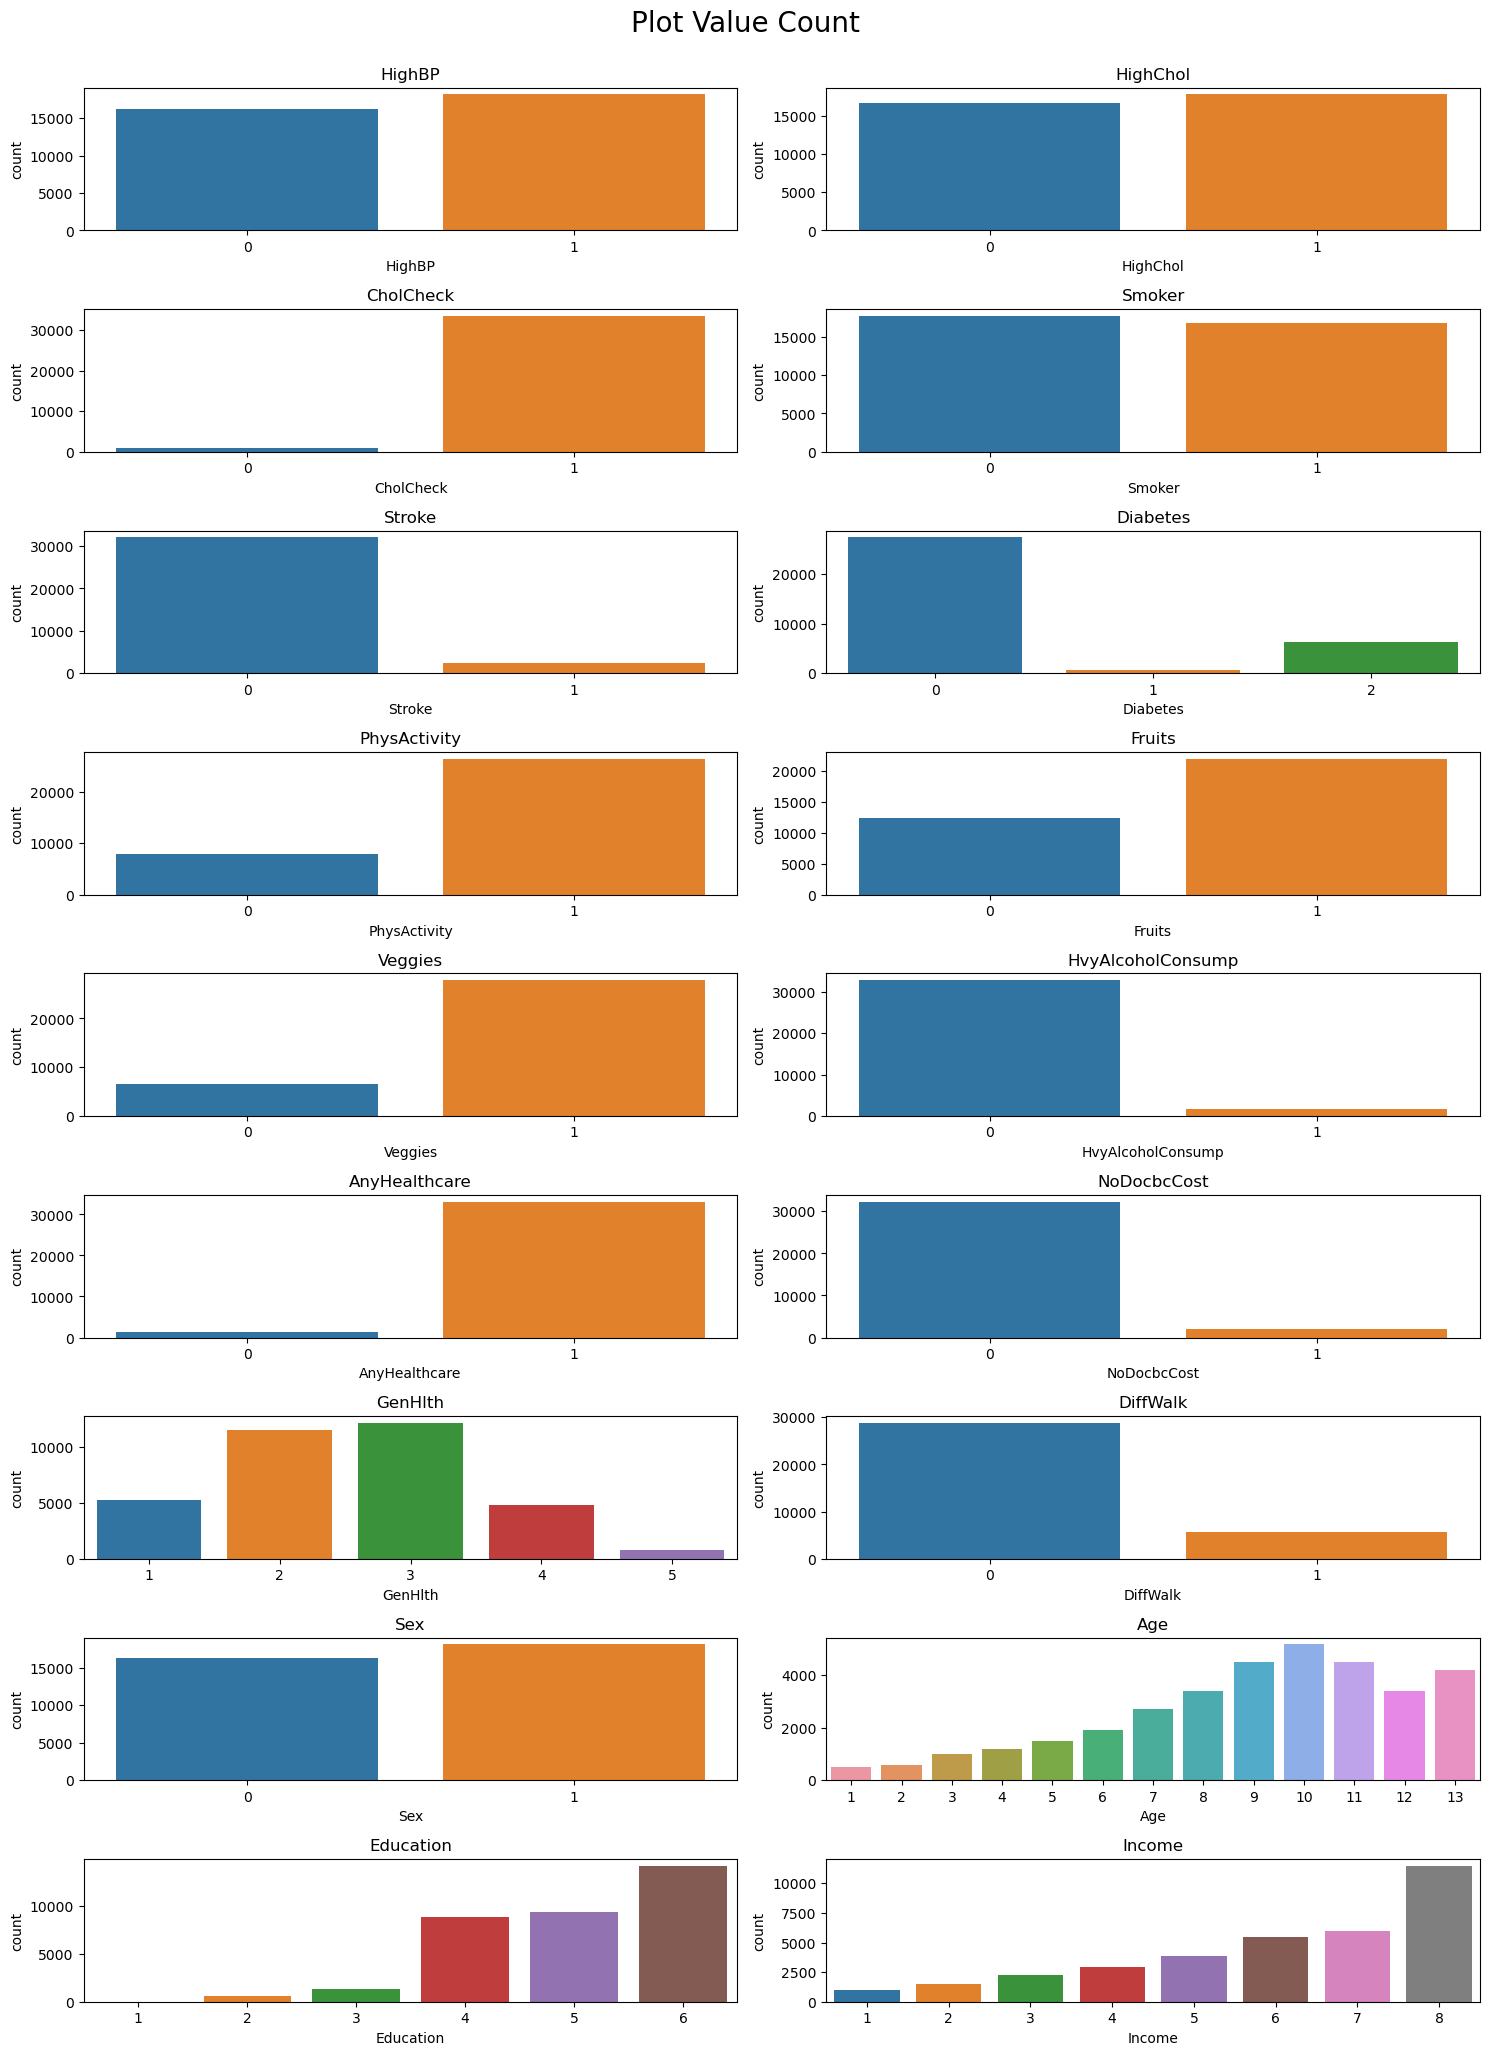

In [351]:
plotBar(df_no_outliers,categoricalFeatures)

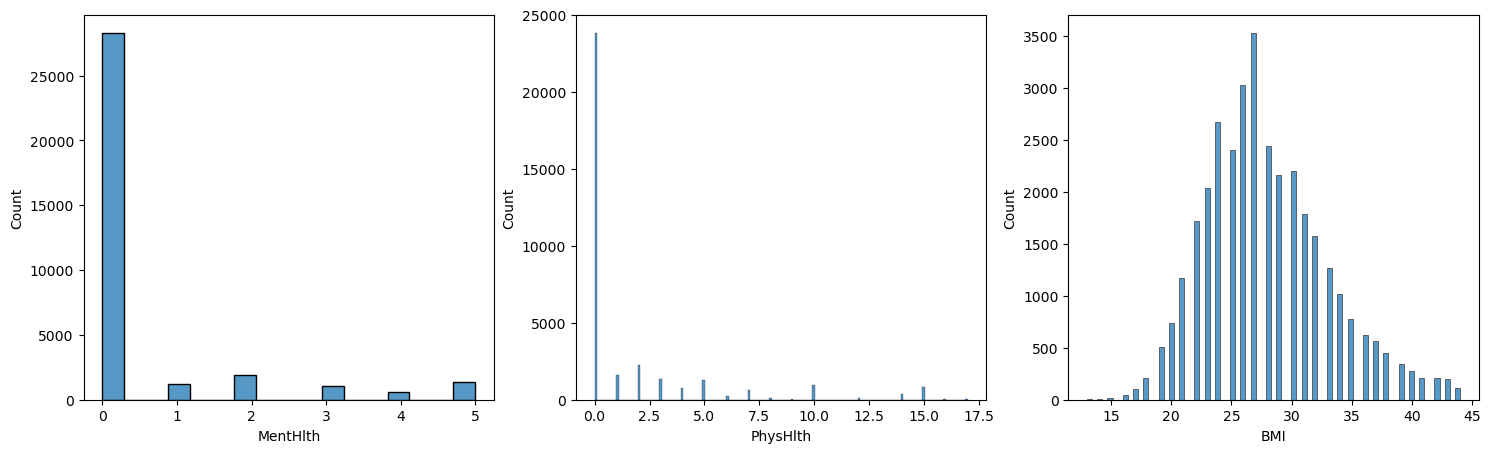

In [352]:
plotBarNC(df_no_outliers,nonCatCol)

In [353]:
# the above 2 blcks of graphs show us similar distribution to before balancing the dataset and removal of outliers, 
# which prove that valuable information to training the model has not been deleted

In [354]:
checkUniq(df_no_outliers,target)

Number of unique values in,  HeartDiseaseorAttack : 2
Value counts:
0    19186
1    15246
Name: HeartDiseaseorAttack, dtype: int64


In [355]:
# the imbalance in the datasets target column has significantly reduced

In [356]:
df_no_outliers

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  Diabetes  \
0           0         0          1   27       0       0         0   
1           0         0          1   27       1       0         0   
2           0         1          1   29       1       0         0   
3           0         0          1   25       0       0         0   
4           1         1          1   32       1       0         0   
...       ...       ...        ...  ...     ...     ...       ...   
34427       1         0          1   35       0       0         0   
34428       0         1          1   29       1       0         2   
34429       1         1          1   23       0       1         0   
34430       1         0          1   30       1       0         0   
34431       1         1          1   25       0       0         2   

       PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0                 1       1        1  ...            0        1         0   
1                 1       1        1  ...            0        2         5   
2                 1       1        1  ...            0        3         0   
3                 1       1        0  ...            0        3         0   
4                 1       1        1  ...            0        3         0   
...             ...     ...      ...  ...          ...      ...       ...   
34427             0       0        1  ...            0        4         0   
34428             0       1        1  ...            0        2         0   
34429             0       0        0  ...            1        4         0   
34430             1       1        1  ...            0        3         0   
34431             1       1        0  ...            0        2         0   

       PhysHlth  DiffWalk  Sex  Age  Education  Income  HeartDiseaseorAttack  
0             0         0    0    4          4       4                     0  
1             2         0    0    6          6       8                     0  
2             0         0    1    3          4       7                     0  
3             0         0    1    7          6       8                     0  
4             0         0    0   10          3       6                     0  
...         ...       ...  ...  ...        ...     ...                   ...  
34427         0         0    1    3          2       1                     1  
34428         0         1    1   10          3       6                     1  
34429         5         0    1    8          3       2                     1  
34430         0         0    1   12          2       1                     1  
34431         0         0    0    9          6       2                     1  

[34432 rows x 22 columns]

In [357]:
resetIndex()

In [358]:
df_final=df_no_outliers.copy()


In [359]:
#selection on best features from the dataset
#initially, the model is trained on the entire dataset, using all the features, the model is then retrained
# using a reduced number of features and lesser important features are removed.

# splitting the data into train test split 80%train 20% test
df_final=df_no_outliers.copy()
X = df_final.drop(target, axis=1)
y = df_final[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialising the logistic regression model
logistic_model = LogisticRegression(solver='liblinear')

# Using Recursive Feature Elimination with Cross-Validation (RFECV)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# initialising the RFECV model
rfecv = RFECV(estimator=logistic_model, cv=cv, scoring='accuracy')

rfecv.fit(X_train, y_train)

# Print the results
print("Optimal number of features: ", rfecv.n_features_)
print("Selected features: ", X.columns[rfecv.support_])

Optimal number of features:  18
Selected features:  Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes',
       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
       'NoDocbcCost', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')


In [360]:
#checking which best number of feature selection gives best accuracy
#function getK takes the score function as input and plots a grpah of accuracy vs number of selected features
def getK(score):
    # the different k values to run
    k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]  

    solvers = ['liblinear', 'lbfgs', 'sag', 'saga']

    # Create a dictionary to store accuracy scores for each solver
    accuracy_scores_by_solver = {solver: [] for solver in solvers}

    for k in k_values:
        # selects the number of k features with the user selected score function 
        selector = SelectKBest(score_func=score, k=k)
        X_train_new = selector.fit_transform(X_train, y_train)
        X_test_new = selector.transform(X_test)

        for solver in solvers:
            # Trains a model on the above selected k features and evaluate its performance for the different solvers
            model = LogisticRegression(solver=solver)
            model.fit(X_train_new, y_train)
            y_pred = model.predict(X_test_new)
            accuracy = accuracy_score(y_test, y_pred)
            accuracy_scores_by_solver[solver].append(accuracy)

    # Plot the graphs for each solver
    plt.figure(figsize=(12, 8))
    for solver in solvers:
        plt.plot(k_values, accuracy_scores_by_solver[solver], marker='o', label=solver)

    plt.xlabel('Number of Selected Features (k)')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Number of Selected Features for Different Solvers')
    plt.legend()
    plt.grid(True)
    plt.show()


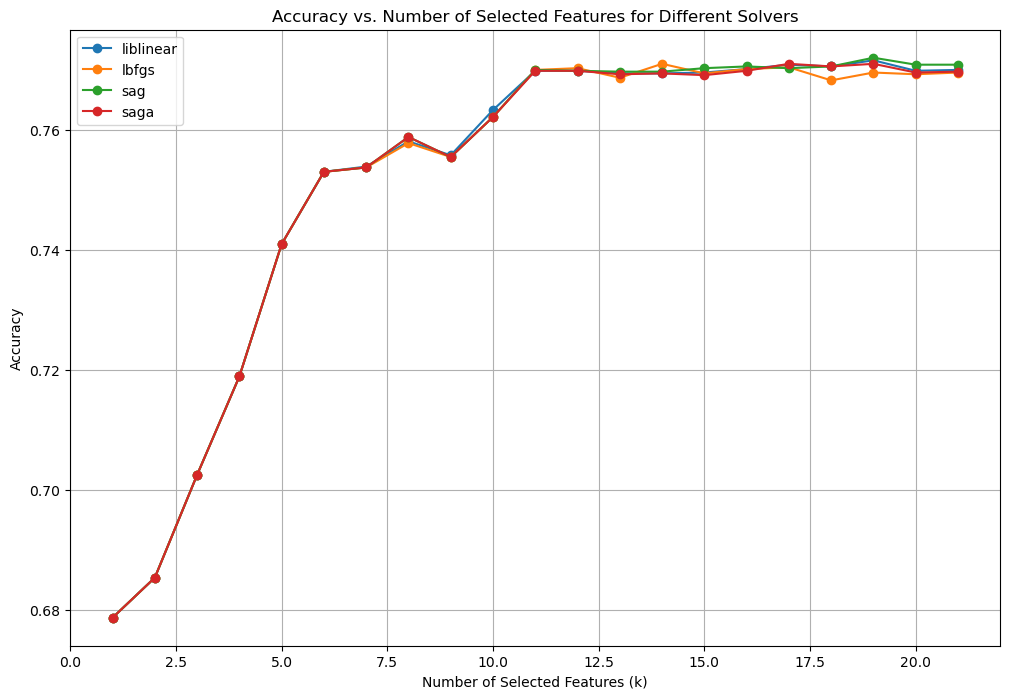

In [361]:
getK(chi2)

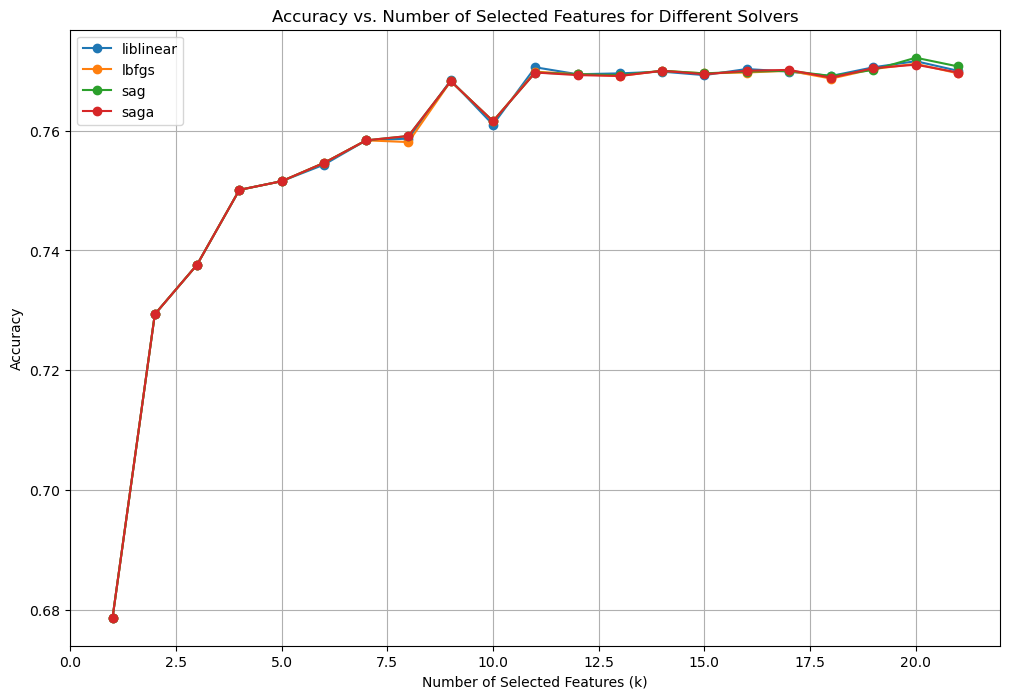

In [362]:
getK(mutual_info_classif)

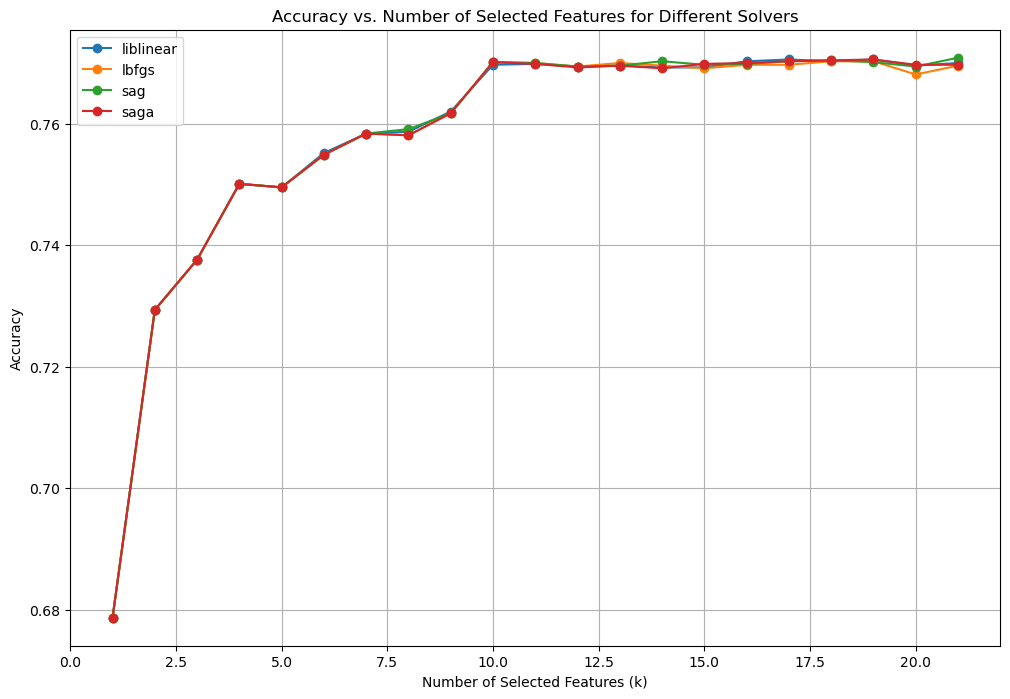

In [363]:
getK(f_classif)

In [364]:
# #we use score functions, chi2, f_classif and mutual_info_classif as 
# they're best suited for binary classification problems.
# we also use multiple solvers which are best suited for binary classification
#  reducing effect of outliers and large datasets.

#from the above 12 experiments we can converge that 10 features provide the 
#maximum accuracy before any signifanct increase in accuracy


In [365]:
#Extracting top 10 best features from the dataset
kVals = 10 

# extracting top 10 features using F-Test
select_features = SelectKBest(score_func=f_classif, k=kVals)
X_new = select_features.fit_transform(X_train, y_train)
selected_feature_names = X_train.columns[select_features.get_support()]
print('f_classif\n',selected_feature_names)

# extracting top 10 features using mutual information classification
select_features = SelectKBest(score_func=mutual_info_classif, k=kVals)
X_new = select_features.fit_transform(X_train, y_train)
selected_feature_names = X_train.columns[select_features.get_support()]
print('mutual_info_classif\n',selected_feature_names)

# extracting top 10 features using chi squared
select_features = SelectKBest(score_func=chi2, k=kVals)
X_new = select_features.fit_transform(X_train, y_train)
selected_feature_names = X_train.columns[select_features.get_support()]
print('chi2\n',selected_feature_names)


f_classif
 Index(['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Income'],
      dtype='object')
mutual_info_classif
 Index(['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Income'],
      dtype='object')
chi2
 Index(['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Income'],
      dtype='object')


In [366]:
# while the above experiments provide us with the top 10 best features, there
# is no way of knowing it's importance, or if the deleted features have more importance to
# the target class

In [367]:
# using tree based models to get top 10 best features

In [368]:
def get_feature_importances(model, X_train, y_train):
    
    # Get feature importances from each fold
    feature_importances = []
    
    # Perform stratified k-fold cross-validation with 10 folds
    for train_index, _ in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_train, y_train):
        
        # Fit the model on the training data for the current fold
        model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
        
        # Append the feature importances for this fold to the list
        feature_importances.append(model.feature_importances_)

    # Average the feature importances across the 10 folds
    average_importances = np.mean(feature_importances, axis=0)
    
    # Return the array of average feature importances
    return average_importances

In [369]:
# tree model initialisation
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gbm_model = GradientBoostingClassifier()

In [370]:
# Get feature importances for each model
dt_importances = get_feature_importances(dt_model, X_train, y_train)
rf_importances = get_feature_importances(rf_model, X_train, y_train)
gbm_importances = get_feature_importances(gbm_model, X_train, y_train)


In [371]:
# printing the results
print("Decision Tree Feature Importances:", dt_importances)
print("Random Forest Feature Importances:", rf_importances)
print("Gradient Boosting Feature Importances:", gbm_importances)

Decision Tree Feature Importances: [0.04602083 0.02857573 0.00418547 0.15463325 0.02713531 0.02158034
 0.02514749 0.02482817 0.03077965 0.02355496 0.00985055 0.00612706
 0.00938606 0.09302633 0.0323454  0.05732461 0.01881865 0.03115744
 0.20915577 0.05958382 0.08678309]
Random Forest Feature Importances: [0.06086706 0.04914325 0.00451149 0.14910589 0.02662474 0.02382192
 0.03045671 0.02328317 0.02835492 0.02188048 0.0095547  0.00656123
 0.00956154 0.09149566 0.03063216 0.05646165 0.02571923 0.03412654
 0.17441925 0.05784355 0.08557487]
Gradient Boosting Feature Importances: [1.55547617e-01 8.80717467e-02 2.17614158e-03 3.92208021e-03
 1.32990042e-02 4.72533029e-02 1.19394255e-02 3.65731496e-04
 7.11630310e-04 9.89162336e-05 2.01142305e-03 2.65744623e-04
 1.52009828e-03 1.85426352e-01 5.01621470e-04 4.60405102e-03
 1.70635618e-02 7.11429319e-02 3.84737261e-01 2.02457855e-03
 7.31677992e-03]


In [372]:
#inset table images here

In [373]:
#from the above 3,combining them, by choosing the one the occurs the most
#first we get
# SET 1
# 1) AGE
# 2) BMI
# 3) GenHlth
# 4) Income
# 5) HighBP
# 6) Education
# 7) PhysHlth
# 8) HighChol
# 9) Sex
# 10) Diabetes

# we will also use one more set of features which is the gradient boosting 
# features without income (as it's least important) and with BMI as its 2nd most important in
# the other 2            

# SET 2   
# 1) Age
# 2) GenHlth
# 3) HighBP
# 4) HighChol
# 5) Sex
# 6) Stroke
# 7) DiffWalk
# 8) Smoker
# 9) Diabetes
# 10) BMI


In [374]:
#using Recursive Feature Elimination to get the top 10 best features

In [375]:
# Creating the model 
model = LogisticRegression()

# Creating the RFE object and number of features to be selected
num_features_to_select = 10  
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fitting RFE to your training data to select the best features
rfe.fit(X_train, y_train)

# Getting the selected feature indices
selected_feature_indices = rfe.support_

# Getting the selected feature names
selected_feature_names = X_train.columns[selected_feature_indices]

# Printing the selected feature names
print("Selected Features:", selected_feature_names)

# Performing 10-fold cross-validation with RFE
cv_scores = cross_val_score(model, X_train[selected_feature_names], y_train, cv=10)

# Printing the cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Printing the average cross-validation score
print("Average Cross-Validation Score:", np.mean(cv_scores))

Selected Features: Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex'],
      dtype='object')
Cross-Validation Scores: [0.74591652 0.73502722 0.73684211 0.75462795 0.73430127 0.74146696
 0.74909223 0.72512709 0.74255628 0.74836601]
Average Cross-Validation Score: 0.7413323632874539


In [376]:
#from the above we get
# SET 3
# 1) HighBP
# 2) HighChol
# 3) CholCheck
# 4) Smoker
# 5) Stroke
# 6) HvyAlcoholConsumption
# 7) NoDocbcCost
# 8) GenHlth
# 9) DiffWalk
# 10) Sex

In [377]:
#preprocessing ends

In [378]:
#creating the differents sets of data
df_final = df_final.sample(frac=1, random_state=42)
df_final.reset_index(drop=True, inplace=True)
set1=df_final[['Age','BMI','GenHlth','Income','HighBP','Education','PhysHlth','HighChol','Sex','Diabetes','HeartDiseaseorAttack']].copy()
set2=df_final[['Age','GenHlth','HighBP','HighChol','Sex','Stroke','DiffWalk','Smoker','Diabetes','BMI','HeartDiseaseorAttack']].copy()
set3=df_final[['HighBP','HighChol','CholCheck','Smoker','Stroke','HvyAlcoholConsump','NoDocbcCost','GenHlth','DiffWalk','Sex','HeartDiseaseorAttack']].copy()
#set4=df_final[['Age','GenHlth','HighBP','HighChol','Sex','Stroke','DiffWalk','Smoker','Diabetes','BMI','HeartDiseaseorAttack']].copy()


In [379]:
checkUniq(set1,target)

Number of unique values in,  HeartDiseaseorAttack : 2
Value counts:
0    19186
1    15246
Name: HeartDiseaseorAttack, dtype: int64


In [380]:
def makeTestset(df):
    
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]

    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)    

    #removing the test set from the original DataFrame:
    
    #combining the training data together
    df_train = pd.concat([X_train, y_train], axis=1)
    
    #combining the test data (new data) together
    df_test = pd.concat([X_test, y_test], axis=1)
    
    #creating a new data frame without the test set in it
    df_original_without_test = df.drop(df_test.index)
    
    #resetting the indexes to ensure continuity
    df_original_without_test.reset_index(drop=True, inplace=True)
    df_test.reset_index(drop=True, inplace=True)
    
    #returning the original dataset without the test set in it and the test set separately
    return df_original_without_test, df_test


In [381]:
df_default, default_test= makeTestset(df_final)
df_set1, set1_test= makeTestset(set1)
df_set2, set2_test= makeTestset(set2)
df_set3, set3_test= makeTestset(set3)

In [382]:
checkUniq(set2_test,target)

Number of unique values in,  HeartDiseaseorAttack : 2
Value counts:
0    1919
1    1525
Name: HeartDiseaseorAttack, dtype: int64


<h1>KNN

In [272]:
#searching for best k value
def findKbest(df):
    target='HeartDiseaseorAttack'
    X=df.drop(target, axis=1)
    y= df[target]
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardise the features 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Defining a range of K values to try
    k_values = list(range(1, 21))  

    # Perform cross-validation for each K value and store the results
    cv_scores = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        # Using 10-fold cross-validation, to get average accuracy across 10 folds
        scores = cross_val_score(knn, X_train, y_train, cv=10)  
        cv_scores.append(np.mean(scores))
   

    # Plot the graph
    plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
    plt.xlabel('K Value')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title('KNN: Cross-Validation Accuracy vs. K')
    plt.grid(True)
    plt.show()

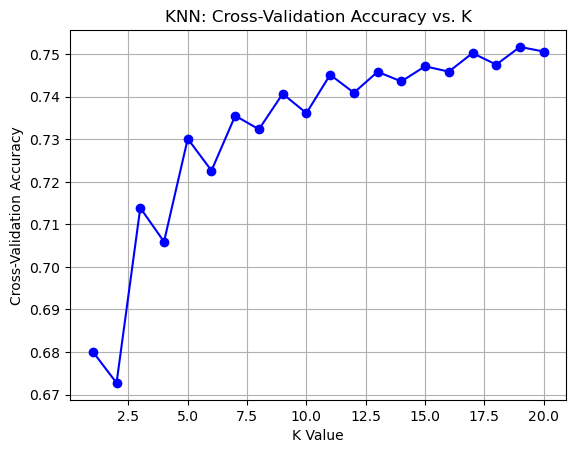

In [273]:
findKbest(df_default)

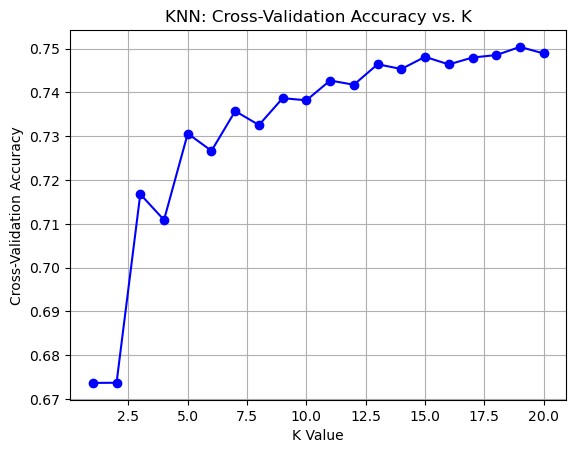

In [274]:
findKbest(df_set1)

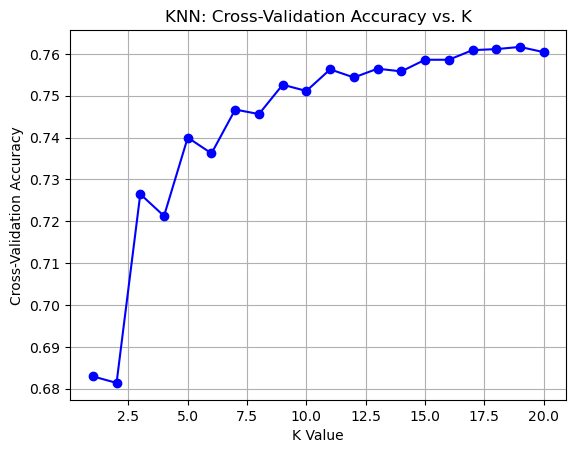

In [275]:
findKbest(df_set2)

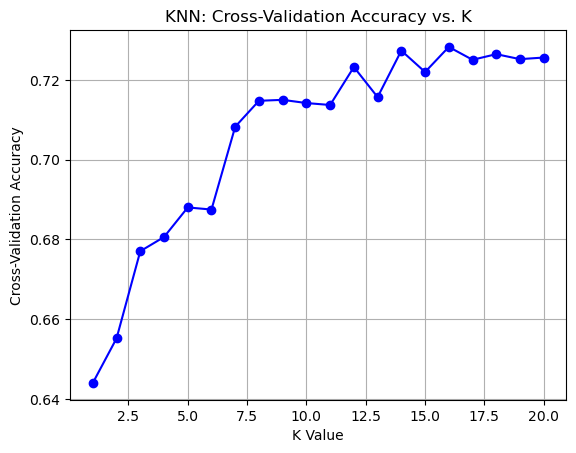

In [276]:
findKbest(df_set3)

In [277]:
# from the above we can conclude that k=15 provids the best accuracy, after k=15 theres in not much improvement 
# how ever set 1 set 2 and set 3 show k=11 providing a high accuracy without any significant increase in accuracy

In [278]:
# running default knn
def defaultKNN(df,K):
    target='HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    k = K  
    
    # Initialising knn classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fitting the model to the training data
    knn.fit(X_train, y_train)
    # Making predictions on the test set
    y_pred = knn.predict(X_test)

    # Printing train accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Printing Classification report
    print(classification_report(y_test, y_pred))

    # Printing confusion matrix
    cm=confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Calculating Sensitivity and Specificity and printing them
    specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    print("Specificity:", specificity)
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    print("Sensitivity (Recall):", sensitivity)
    
    # Calculating predicted probabilities for positive class
    y_pred_prob = knn.predict_proba(X_test)[:, 1]
    # Calculating ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plotting ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')    
    plt.grid(True)
    plt.show()    
    return knn, scaler, fpr, tpr, roc_auc

Accuracy: 0.7445950306550501
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      3486
           1       0.70      0.72      0.71      2712

    accuracy                           0.74      6198
   macro avg       0.74      0.74      0.74      6198
weighted avg       0.75      0.74      0.74      6198

Confusion Matrix:
[[2659  827]
 [ 756 1956]]
Specificity: 0.7028386633129716
Sensitivity (Recall): 0.7786237188872621


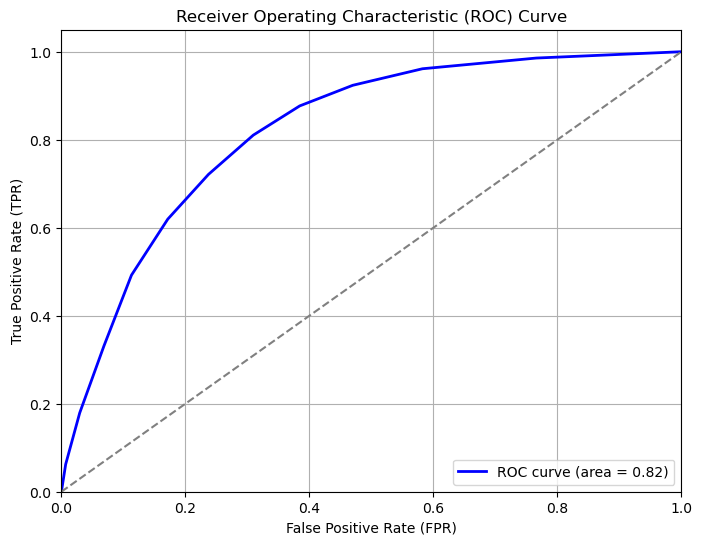

Accuracy on test set
0.7505807200929152


In [280]:
knnSet0,scaler0,fpr15,tpr15,roc_auc15=defaultKNN(df_default,11)
testReg_scal(default_test,scaler0,knnSet0)

Accuracy: 0.7476605356566635
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      3486
           1       0.70      0.73      0.72      2712

    accuracy                           0.75      6198
   macro avg       0.74      0.75      0.74      6198
weighted avg       0.75      0.75      0.75      6198

Confusion Matrix:
[[2657  829]
 [ 735 1977]]
Specificity: 0.7045616535994298
Sensitivity (Recall): 0.7833136792452831


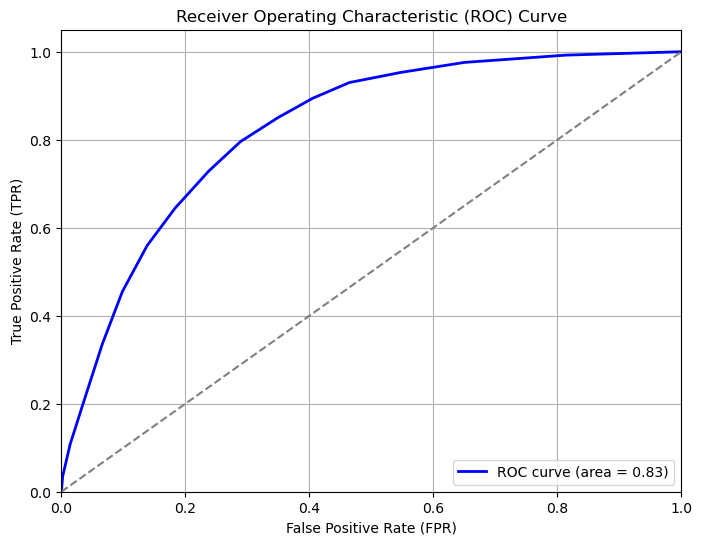

Accuracy on test set
0.756678281068525


In [282]:
knnSet0,scaler0,fpr10,tpr10,roc_auc10=defaultKNN(df_default,15)
testReg_scal(default_test,scaler0,knnSet0)

Accuracy: 0.7491126169732172
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      3486
           1       0.71      0.72      0.72      2712

    accuracy                           0.75      6198
   macro avg       0.75      0.75      0.75      6198
weighted avg       0.75      0.75      0.75      6198

Confusion Matrix:
[[2689  797]
 [ 758 1954]]
Specificity: 0.7102871683024354
Sensitivity (Recall): 0.7800986364955034


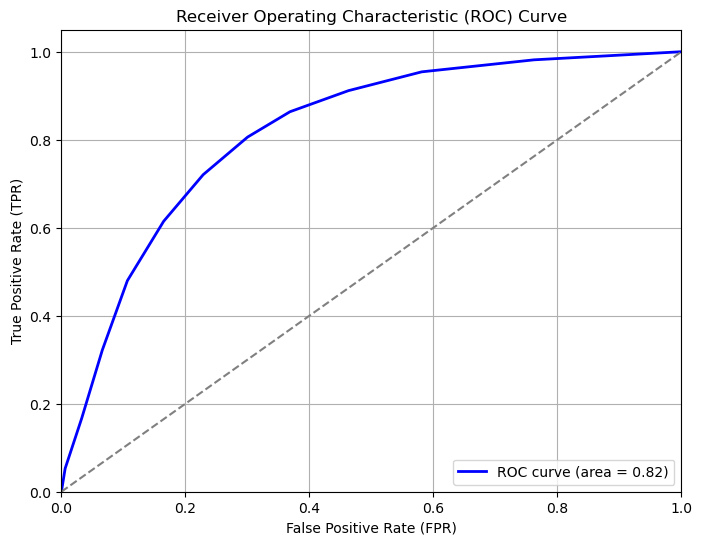

Accuracy on test set
0.75


In [283]:
knnSet1a,scaler1a,fpr16,tpr16,roc_auc16=defaultKNN(df_set1,11)
testReg_scal(set1_test,scaler1a,knnSet1a)

Accuracy: 0.7597612132946112
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3486
           1       0.72      0.73      0.73      2712

    accuracy                           0.76      6198
   macro avg       0.76      0.76      0.76      6198
weighted avg       0.76      0.76      0.76      6198

Confusion Matrix:
[[2721  765]
 [ 724 1988]]
Specificity: 0.7221213221939702
Sensitivity (Recall): 0.7898403483309143


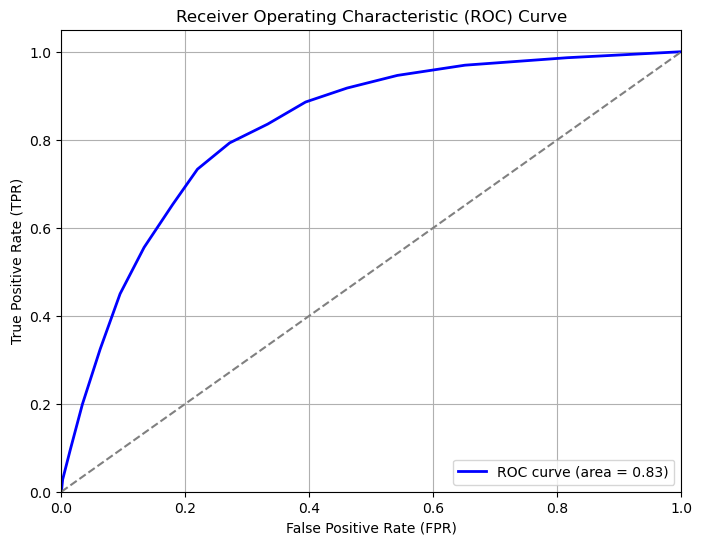

Accuracy on test set
0.7488385598141696


In [284]:
knnSet1b,scaler1b,fpr9,tpr9,roc_auc9=defaultKNN(df_set1,15)
testReg_scal(set1_test,scaler1b,knnSet1b)

Accuracy: 0.7586318167150694
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      3486
           1       0.72      0.74      0.73      2712

    accuracy                           0.76      6198
   macro avg       0.75      0.76      0.76      6198
weighted avg       0.76      0.76      0.76      6198

Confusion Matrix:
[[2703  783]
 [ 713 1999]]
Specificity: 0.7185478073328541
Sensitivity (Recall): 0.7912763466042154


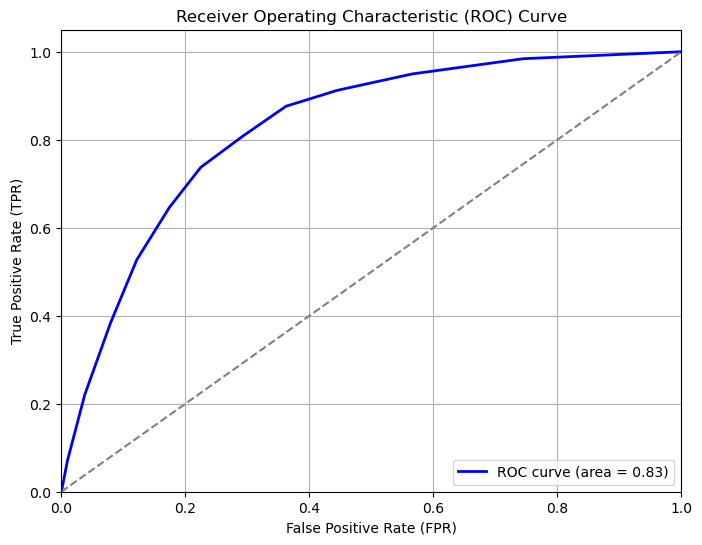

Accuracy on test set
0.7604529616724739


In [285]:
knnSet2a,scaler2a,fpr17,tpr17,roc_auc17=defaultKNN(df_set2,11)
testReg_scal(set2_test,scaler2a,knnSet2a)

Accuracy: 0.760729267505647
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3486
           1       0.72      0.74      0.73      2712

    accuracy                           0.76      6198
   macro avg       0.76      0.76      0.76      6198
weighted avg       0.76      0.76      0.76      6198

Confusion Matrix:
[[2713  773]
 [ 710 2002]]
Specificity: 0.7214414414414414
Sensitivity (Recall): 0.7925796085305288


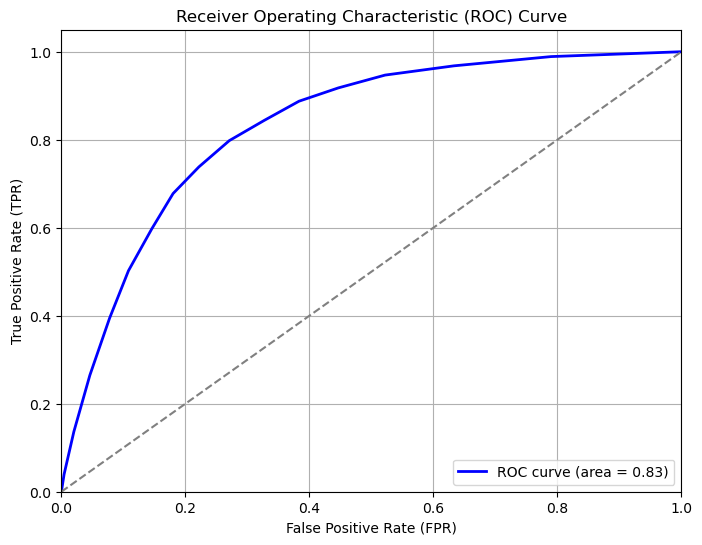

Accuracy on test set
0.7592915214866435


In [286]:
knnSet2b,scaler2b,fpr8,tpr8,roc_auc8=defaultKNN(df_set2,15)
testReg_scal(set2_test,scaler2b,knnSet2b)

Accuracy: 0.7094223943207486
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      3486
           1       0.65      0.74      0.69      2712

    accuracy                           0.71      6198
   macro avg       0.71      0.71      0.71      6198
weighted avg       0.72      0.71      0.71      6198

Confusion Matrix:
[[2402 1084]
 [ 717 1995]]
Specificity: 0.6479376420915882
Sensitivity (Recall): 0.7701186277653094


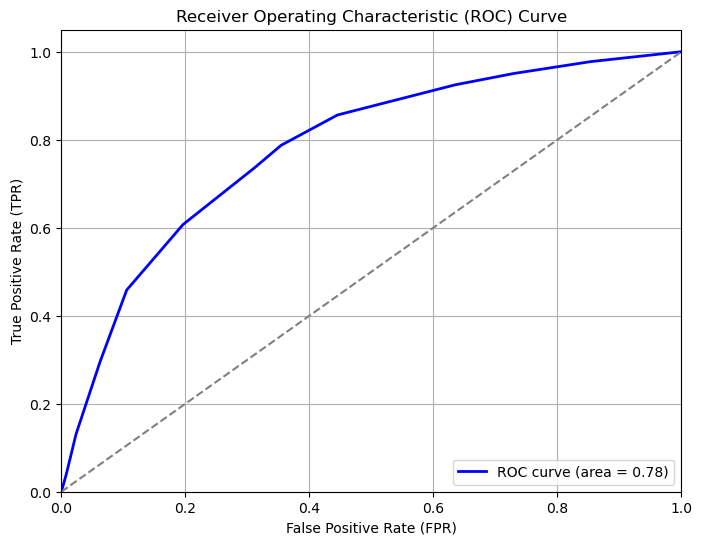

Accuracy on test set
0.7180603948896632


In [287]:
knnSet3a,scaler3a,fpr18,tpr18,roc_auc18=defaultKNN(df_set3,11)
testReg_scal(set3_test,scaler3a,knnSet3a)

Accuracy: 0.7191029364311068
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      3486
           1       0.66      0.74      0.70      2712

    accuracy                           0.72      6198
   macro avg       0.72      0.72      0.72      6198
weighted avg       0.73      0.72      0.72      6198

Confusion Matrix:
[[2448 1038]
 [ 703 2009]]
Specificity: 0.6593370528388579
Sensitivity (Recall): 0.7768962234211362


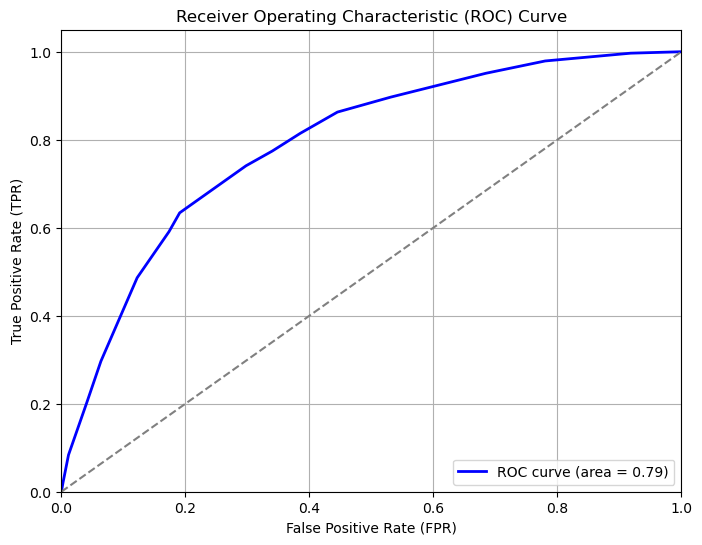

Accuracy on test set
0.7168989547038328


In [288]:
knnSet3b,scaler3b,fpr6,tpr6,roc_auc6=defaultKNN(df_set3,15)
testReg_scal(set3_test,scaler3b,knnSet3b)

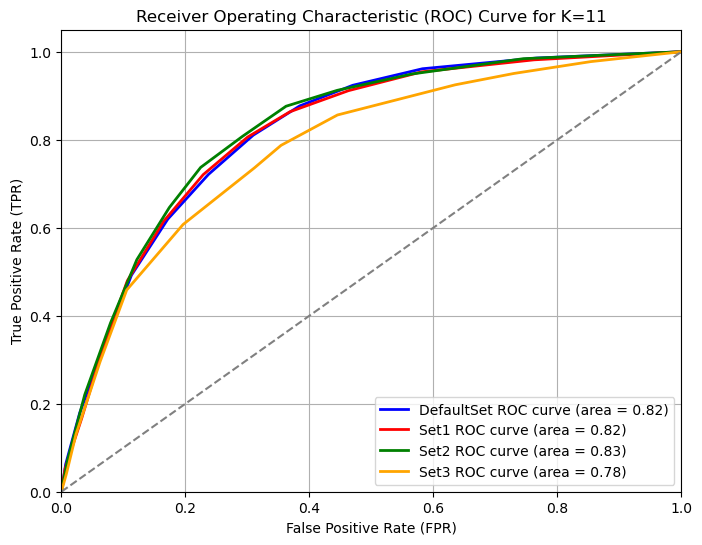

In [289]:
# Plot ROC curve for k=11 for all sets
plt.figure(figsize=(8, 6))
plt.plot(fpr15, tpr15, color='blue', lw=2, label='DefaultSet ROC curve (area = {:.2f})'.format(roc_auc15))
plt.plot(fpr16, tpr16, color='red', lw=2, label='Set1 ROC curve (area = {:.2f})'.format(roc_auc16))
plt.plot(fpr17, tpr17, color='green', lw=2, label='Set2 ROC curve (area = {:.2f})'.format(roc_auc17))
plt.plot(fpr18, tpr18, color='orange', lw=2, label='Set3 ROC curve (area = {:.2f})'.format(roc_auc18))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for K=11')
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

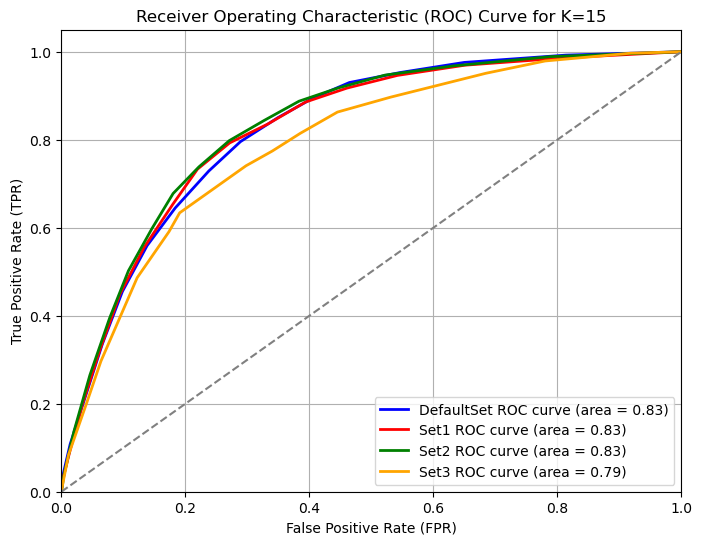

In [290]:
# Plot ROC curve for k=15 for all sets
plt.figure(figsize=(8, 6))
plt.plot(fpr10, tpr10, color='blue', lw=2, label='DefaultSet ROC curve (area = {:.2f})'.format(roc_auc10))
plt.plot(fpr9, tpr9, color='red', lw=2, label='Set1 ROC curve (area = {:.2f})'.format(roc_auc9))
plt.plot(fpr8, tpr8, color='green', lw=2, label='Set2 ROC curve (area = {:.2f})'.format(roc_auc8))
plt.plot(fpr6, tpr6, color='orange', lw=2, label='Set3 ROC curve (area = {:.2f})'.format(roc_auc6))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for K=15')
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

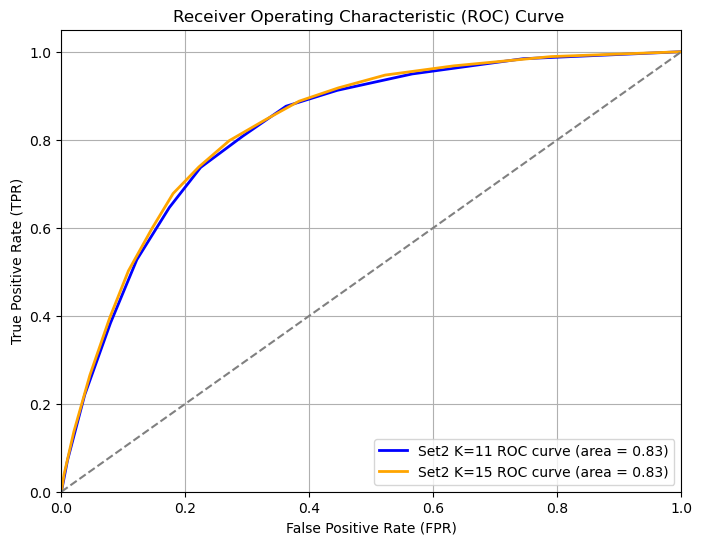

In [291]:
# Plot ROC curve for best performing from k=11 and k=15
plt.figure(figsize=(8, 6))
plt.plot(fpr17, tpr17, color='blue', lw=2, label='Set2 K=11 ROC curve (area = {:.2f})'.format(roc_auc17))
plt.plot(fpr8, tpr8, color='orange', lw=2, label='Set2 K=15 ROC curve (area = {:.2f})'.format(roc_auc8))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

In [292]:
#HyperParameter tunning for KNN

In [293]:
def KNN_tune(df):
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]
    # Defining the hyperparameter grid to search
    param_grid = {
        # Values for k
        'n_neighbors': [7,9,11,13,15],    
        # uniform asigns equal weights to nearest neighbours, distance asigns weight
        # that is inversely proportional to their distance.
        'weights': ['uniform', 'distance'],
        # Distance metric ('1'=Manhattan or '2'=Euclidean)
        'p': [1, 2]                       
    }

    # Creating the KNN model
    knn_model = KNeighborsClassifier()

    # Creating the GridSearchCV object with cross-validation 
    grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

    # Fitting the grid search object to your data
    grid_search.fit(X, y)

    # Printing the best hyperparameters and corresponding accuracy
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)


In [294]:
#Cheking to see if there are any combinations which increase the accuracy significantly

In [295]:
KNN_tune(df_default)

Best Hyperparameters: {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.7466114665365096


In [296]:
KNN_tune(df_set1)

Best Hyperparameters: {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.7439653371180566


In [297]:
KNN_tune(df_set2)

Best Hyperparameters: {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.7531626541475822


In [298]:
KNN_tune(df_set3)

Best Hyperparameters: {'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.7256681750980293


In [299]:
def knnCustThres(df, threshold=0.5, k=15):    
    X=df.drop(target,axis=1)
    y=df[target]
    # Create train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    #Initialising KNN classifier
    knn_model = KNeighborsClassifier(n_neighbors=k)

    #Fitting the model to the training data
    knn_model.fit(X_train, y_train)

    #Getting class probabilities for the test data
    y_probabilities = knn_model.predict_proba(X_test)

    #Convertting probabilities to binary predictions based on the custom threshold
    y_pred = (y_probabilities[:, 1] >= threshold).astype(int)

    #Evaluating the model with the custom threshold
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    #printing classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    # Calculating sensitivity and specificity from the confusion matrix
    sensitivity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
    print("Sensitivity (Recall):", sensitivity)
    print("Specificity:", specificity)
    return knn_model,scaler


In [300]:
i=0
thres=0.4
for i in range(10):
    print('threshold = ',thres)
    model,scaler=knnCustThres(df_set1,threshold=thres)
    testThres_scal(set1_test,model,scaler,threshold=thres)
    thres+=0.01
    print()

threshold =  0.4
Accuracy: 0.7408841561794127
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74      3486
           1       0.66      0.84      0.74      2712

    accuracy                           0.74      6198
   macro avg       0.75      0.75      0.74      6198
weighted avg       0.76      0.74      0.74      6198

Confusion Matrix:
[[2326 1160]
 [ 446 2266]]
Sensitivity (Recall): 0.6672403901319564
Specificity: 0.8355457227138643
Test Accuracy 0.7421602787456446

threshold =  0.41000000000000003
Accuracy: 0.7566957082929977
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      3486
           1       0.69      0.79      0.74      2712

    accuracy                           0.76      6198
   macro avg       0.76      0.76      0.76      6198
weighted avg       0.76      0.76      0.76      6198

Confusion Matrix:
[[2540  946]
 [ 562 21

In [301]:
model=knnCustThres(df_set1,threshold=0.5)

Accuracy: 0.7597612132946112
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3486
           1       0.72      0.73      0.73      2712

    accuracy                           0.76      6198
   macro avg       0.76      0.76      0.76      6198
weighted avg       0.76      0.76      0.76      6198

Confusion Matrix:
[[2721  765]
 [ 724 1988]]
Sensitivity (Recall): 0.7805507745266781
Specificity: 0.7330383480825958


In [302]:
i=0
thres=0.4
for i in range(10):
    print('threshold = ',thres)
    model,scaler=knnCustThres(df_set2,threshold=thres)
    testThres_scal(set2_test,model,scaler,threshold=thres)
    thres+=0.01
    print()

threshold =  0.4
Accuracy: 0.7476605356566635
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.67      0.75      3486
           1       0.67      0.84      0.75      2712

    accuracy                           0.75      6198
   macro avg       0.76      0.76      0.75      6198
weighted avg       0.77      0.75      0.75      6198

Confusion Matrix:
[[2345 1141]
 [ 423 2289]]
Sensitivity (Recall): 0.6726907630522089
Specificity: 0.8440265486725663
Test Accuracy 0.7523228803716608

threshold =  0.41000000000000003
Accuracy: 0.7592771861890932
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      3486
           1       0.70      0.80      0.74      2712

    accuracy                           0.76      6198
   macro avg       0.76      0.76      0.76      6198
weighted avg       0.77      0.76      0.76      6198

Confusion Matrix:
[[2542  944]
 [ 548 21

In [303]:
model=knnCustThres(df_set2,threshold=0.5)

Accuracy: 0.760729267505647
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3486
           1       0.72      0.74      0.73      2712

    accuracy                           0.76      6198
   macro avg       0.76      0.76      0.76      6198
weighted avg       0.76      0.76      0.76      6198

Confusion Matrix:
[[2713  773]
 [ 710 2002]]
Sensitivity (Recall): 0.7782558806655192
Specificity: 0.7382005899705014


In [304]:
i=0
thres=0.4
for i in range(10):
    print('threshold = ',thres)
    model,scaler=knnCustThres(df_set3,threshold=thres)
    testThres_scal(set3_test,model,scaler,threshold=thres)
    thres+=0.01
    print()

threshold =  0.4
Accuracy: 0.70216198773798
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      3486
           1       0.62      0.81      0.71      2712

    accuracy                           0.70      6198
   macro avg       0.72      0.71      0.70      6198
weighted avg       0.73      0.70      0.70      6198

Confusion Matrix:
[[2143 1343]
 [ 503 2209]]
Sensitivity (Recall): 0.6147446930579461
Specificity: 0.81452802359882
Test Accuracy 0.7035423925667829

threshold =  0.41000000000000003
Accuracy: 0.7099064214262666
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      3486
           1       0.64      0.77      0.70      2712

    accuracy                           0.71      6198
   macro avg       0.71      0.72      0.71      6198
weighted avg       0.72      0.71      0.71      6198

Confusion Matrix:
[[2300 1186]
 [ 612 2100]]

In [305]:
model=knnCustThres(df_set3,threshold=0.5)

Accuracy: 0.7191029364311068
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      3486
           1       0.66      0.74      0.70      2712

    accuracy                           0.72      6198
   macro avg       0.72      0.72      0.72      6198
weighted avg       0.73      0.72      0.72      6198

Confusion Matrix:
[[2448 1038]
 [ 703 2009]]
Sensitivity (Recall): 0.7022375215146299
Specificity: 0.7407817109144543


In [306]:
#0.46 for set1 KNN OG: FN-724 FP-765 New: FN-562 FP-946
#0.46 for set2 KNN OG: FN-710 FP-773 New: FN-548 FP-944
#0.46 for set3 KNN OG: FN-703 FP-1038 New: FN-612 FP-1186

<h1> XGBoost

In [247]:
#XGBoost
def XGboost(df):
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]

    #Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Create and train the XGBoost model
    model = xgb.XGBClassifier(
        n_estimators=100,   # Number of boosting rounds (trees)
        learning_rate=0.1,   # Step size shrinkage for boosting
        max_depth=3,         # Maximum tree depth
        objective='binary:logistic'  # For binary classification
    )
    # Fitting the model
    model.fit(X_train, y_train)

    #Make predictions
    y_pred = model.predict(X_test)

    #Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    conf_matrix=confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    
    # Calculating sensitivity and specificity from the confusion matrix
    sensitivity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
    print("Sensitivity (Recall):", sensitivity)
    print("Specificity:", specificity)
    
    #Predicting probabilities of X_test
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculating ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    return model, fpr, tpr , roc_auc
    


Accuracy: 0.7733139722491126
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3486
           1       0.73      0.76      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2733  753]
 [ 652 2060]]
Sensitivity (Recall): 0.7839931153184165
Specificity: 0.7595870206489675


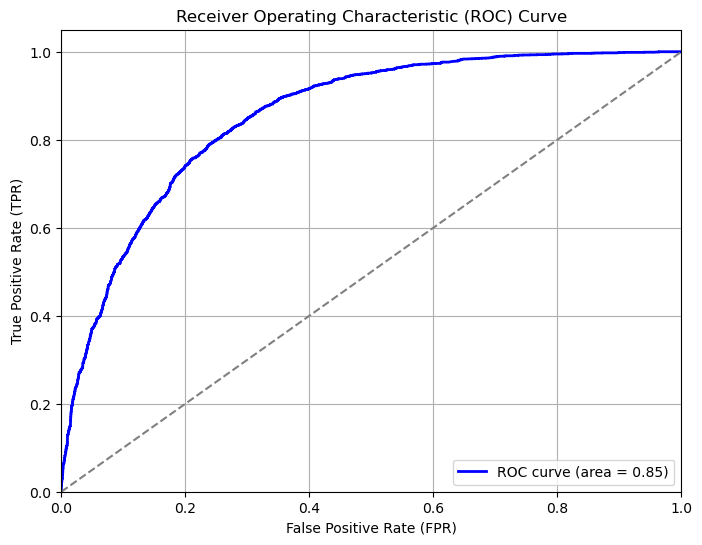

Test Accuracy 0.7740998838559814


In [248]:
model,fpr0,tpr0,roc_auc0=XGboost(df_default)
testReg_noScal(default_test,model)

Accuracy: 0.7662149080348499
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      3486
           1       0.72      0.76      0.74      2712

    accuracy                           0.77      6198
   macro avg       0.76      0.77      0.76      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2681  805]
 [ 644 2068]]
Sensitivity (Recall): 0.7690763052208835
Specificity: 0.7625368731563422


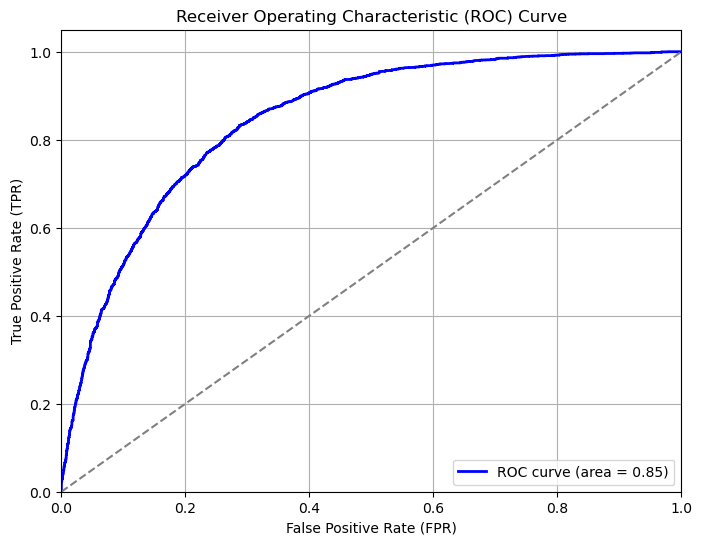

Test Accuracy 0.7653890824622532


In [249]:
model,fpr20,tpr20,roc_auc20=XGboost(df_set1)
testReg_noScal(set1_test,model)

Accuracy: 0.7728299451435947
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3486
           1       0.73      0.76      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2732  754]
 [ 654 2058]]
Sensitivity (Recall): 0.7837062535857716
Specificity: 0.7588495575221239


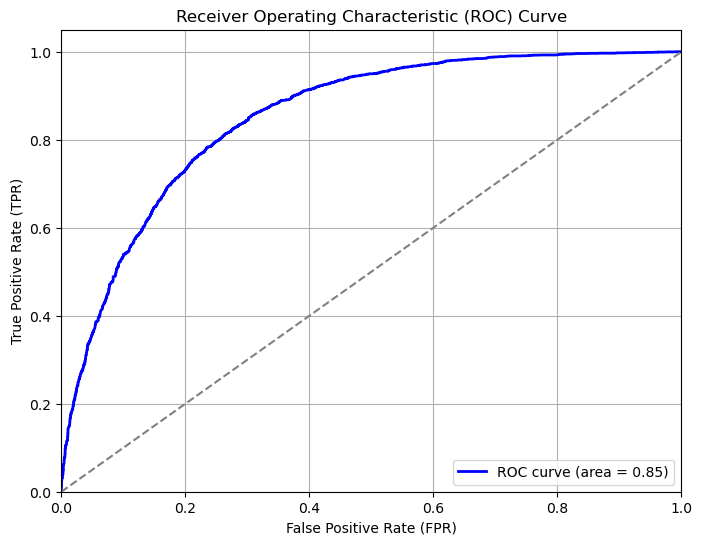

Test Accuracy 0.7749709639953543


In [250]:
model2,fpr21,tpr21,roc_auc21=XGboost(df_set2)
testReg_noScal(set2_test,model2)

Accuracy: 0.7399161019683769
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3486
           1       0.70      0.70      0.70      2712

    accuracy                           0.74      6198
   macro avg       0.74      0.74      0.74      6198
weighted avg       0.74      0.74      0.74      6198

Confusion Matrix:
[[2693  793]
 [ 819 1893]]
Sensitivity (Recall): 0.7725186460126219
Specificity: 0.6980088495575221


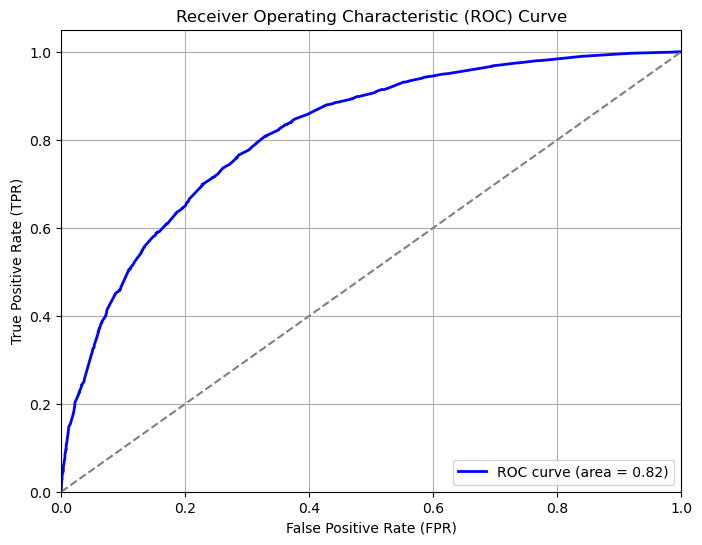

Test Accuracy 0.7389663182346109


In [251]:
model3,fpr22,tpr22,roc_auc22=XGboost(df_set3)
testReg_noScal(set3_test,model3)

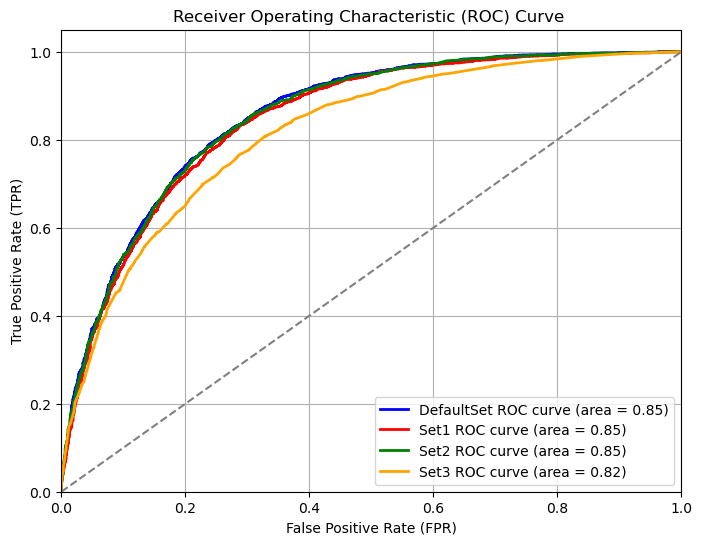

In [252]:
#evaluating all the roc_auc together
# Plot ROC curve for all XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr0, tpr0, color='blue', lw=2, label='DefaultSet ROC curve (area = {:.2f})'.format(roc_auc0))
plt.plot(fpr20, tpr20, color='red', lw=2, label='Set1 ROC curve (area = {:.2f})'.format(roc_auc20))
plt.plot(fpr21, tpr21, color='green', lw=2, label='Set2 ROC curve (area = {:.2f})'.format(roc_auc21))
plt.plot(fpr22, tpr22, color='orange', lw=2, label='Set3 ROC curve (area = {:.2f})'.format(roc_auc22))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

In [253]:
def XGboostTuneParam(df):    
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]

    #Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Creating the pipeline with StandardScaler and XGBoost
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('xgb', xgb.XGBClassifier(objective='binary:logistic'))
    ])
    #Defining the hyperparameter grid to search
    param_grid = {
        'xgb__n_estimators': [50, 100, 150],           # Number of boosting rounds
        'xgb__learning_rate': [1, 0.1, 0.01],          # Step size shrinkage
        'xgb__max_depth': [3, 5, 7],                   # Maximum tree depth for base learners
    }
    #Creating GridSearchCV to search over the hyperparameter grid
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

    #Fitting the grid search object to your data
    grid_search.fit(X_train, y_train)

    #Getting the best hyperparameters and corresponding accuracy and printing them
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    print("Best Hyperparameters:", best_params)
    print("Best Accuracy:", best_accuracy)

    #Use the best model to make predictions and evaluate the model
    best_model = grid_search.best_estimator_
    #Using the best model to predict values and get accuracy and printing evalution metrics
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Train Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [254]:
XGboostTuneParam(df_default)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}
Best Accuracy: 0.773336022589754
Train Accuracy: 0.7733139722491126
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3486
           1       0.73      0.76      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2733  753]
 [ 652 2060]]


In [255]:
XGboostTuneParam(df_set1)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 150}
Best Accuracy: 0.765147236789028
Train Accuracy: 0.7683123588254276
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      3486
           1       0.72      0.77      0.74      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2686  800]
 [ 636 2076]]


In [256]:
XGboostTuneParam(df_set2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}
Best Accuracy: 0.7726906010488099
Train Accuracy: 0.7728299451435947
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3486
           1       0.73      0.76      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2732  754]
 [ 654 2058]]


In [257]:
XGboostTuneParam(df_set3)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 50}
Best Accuracy: 0.7426784993949174
Train Accuracy: 0.7399161019683769
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3486
           1       0.70      0.70      0.70      2712

    accuracy                           0.74      6198
   macro avg       0.74      0.74      0.74      6198
weighted avg       0.74      0.74      0.74      6198

Confusion Matrix:
[[2685  801]
 [ 811 1901]]


In [258]:
#fine tuning weights of target class to check for improvments
#XGBoost
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

    
def XGboostTune(df):
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]

    #Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Creating and train the XGBoost model
    
    pos_class_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
    model = xgb.XGBClassifier(
        n_estimators=100,   # Number of boosting rounds (trees)
        learning_rate=0.1,   # Step size shrinkage for boosting
        max_depth=3,         # Maximum tree depth
        objective='binary:logistic',
        scale_pos_weight=pos_class_weight
    )

    model.fit(X_train, y_train)

    #Making predictions
    y_pred = model.predict(X_test)

    #Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    conf_matrix=confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    
    # Calculate sensitivity and specificity from the confusion matrix
    sensitivity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

    print("Sensitivity (Recall):", sensitivity)
    print("Specificity:", specificity)
    
    #Plot ROC curve
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    return model
    


In [259]:
checkUniq(df_set1,target)

Number of unique values in,  HeartDiseaseorAttack : 2
Value counts:
0    17267
1    13721
Name: HeartDiseaseorAttack, dtype: int64


Accuracy: 0.7666989351403679
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      3486
           1       0.70      0.81      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.78      0.77      0.77      6198

Confusion Matrix:
[[2547  939]
 [ 507 2205]]
Sensitivity (Recall): 0.7306368330464716
Specificity: 0.8130530973451328


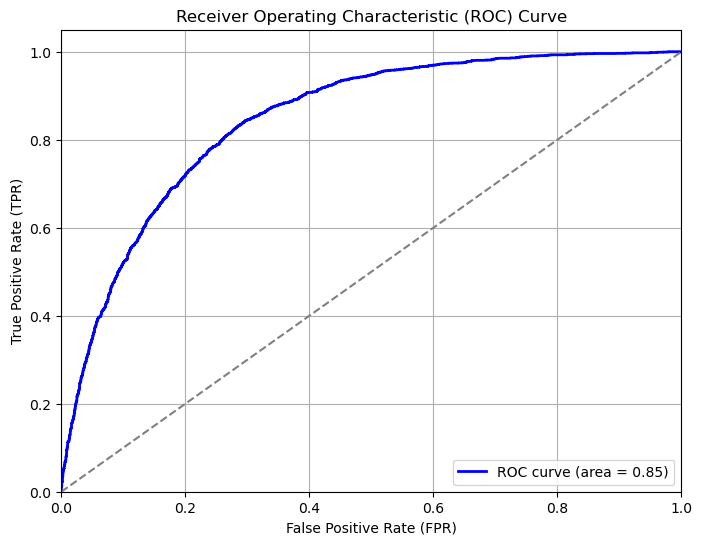

Test Accuracy 0.7624854819976771


In [260]:
model1=XGboostTune(df_set1)
testReg_noScal(set1_test,model1)

Accuracy: 0.7687963859309455
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      3486
           1       0.71      0.81      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.78      0.77      0.77      6198

Confusion Matrix:
[[2572  914]
 [ 519 2193]]
Sensitivity (Recall): 0.7378083763625932
Specificity: 0.8086283185840708


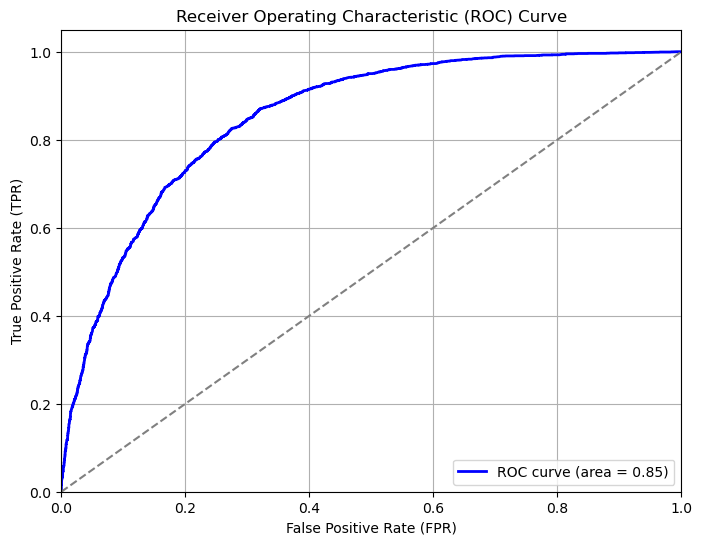

Test Accuracy 0.7740998838559814


In [261]:
model2=XGboostTune(df_set2)
testReg_noScal(set2_test,model2)

Accuracy: 0.7353985156502097
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      3486
           1       0.68      0.76      0.72      2712

    accuracy                           0.74      6198
   macro avg       0.73      0.74      0.73      6198
weighted avg       0.74      0.74      0.74      6198

Confusion Matrix:
[[2491  995]
 [ 645 2067]]
Sensitivity (Recall): 0.7145725760183591
Specificity: 0.7621681415929203


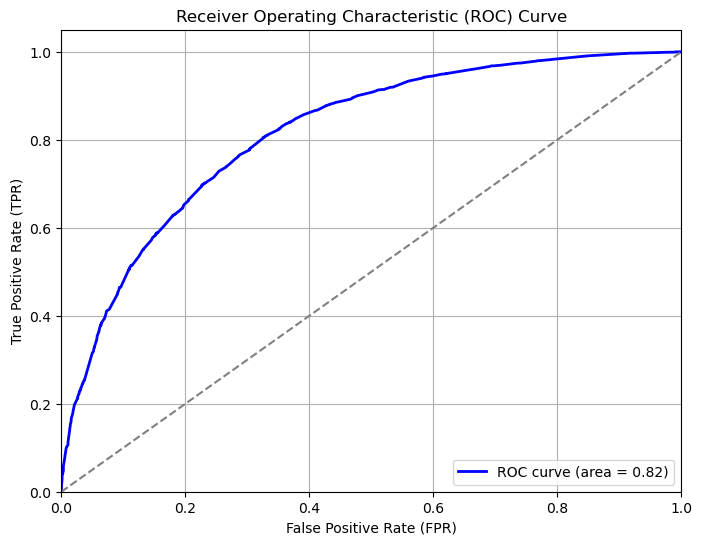

Test Accuracy 0.741869918699187


In [262]:
model3=XGboostTune(df_set3)
testReg_noScal(set3_test,model3)

In [263]:
#adjusting threshold to check for improvements by a decrease in FN
def XGboostTune2(df, threshold=0.5):
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]

    #Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    pos_class_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

    #Creating and training the XGBoost model
    model = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        objective='binary:logistic',
        scale_pos_weight=pos_class_weight
    )
    #Fitting the model
    model.fit(X_train, y_train)

    #Make predictions and adjust the threshold
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_prob >= threshold).astype(int)  # Convert probabilities to binary predictions

    #Evaluating the model and printing evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    conf_matrix=confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    
    # Calculate sensitivity and specificity from the confusion matrix
    sensitivity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])    
    print('Sensitivity : ', sensitivity)
    print('Specificity : ', specificity)
    return model

In [264]:
i=0
thres=0.4
for i in range(10):
    print('threshold = ',thres)
    model=XGboostTune2(df_set1,threshold=thres)
    testThres(set1_test,model,threshold=thres)
    thres+=0.01
    print()

threshold =  0.4
Accuracy: 0.7492739593417231
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.65      0.74      3486
           1       0.66      0.88      0.75      2712

    accuracy                           0.75      6198
   macro avg       0.77      0.76      0.75      6198
weighted avg       0.78      0.75      0.75      6198

Confusion Matrix:
[[2256 1230]
 [ 324 2388]]
Sensitivity :  0.6471600688468159
Specificity :  0.8805309734513275
Test Accuracy 0.7485481997677119

threshold =  0.41000000000000003
Accuracy: 0.7523394643433365
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      3486
           1       0.66      0.88      0.76      2712

    accuracy                           0.75      6198
   macro avg       0.77      0.77      0.75      6198
weighted avg       0.78      0.75      0.75      6198

Confusion Matrix:
[[2285 1201]
 [ 334 2378]]


In [265]:
model=XGboostTune2(df_set1,threshold=0.5)
testThres(set1_test,model,threshold=0.5)

Accuracy: 0.7666989351403679
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      3486
           1       0.70      0.81      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.78      0.77      0.77      6198

Confusion Matrix:
[[2547  939]
 [ 507 2205]]
Sensitivity :  0.7306368330464716
Specificity :  0.8130530973451328
Test Accuracy 0.7624854819976771


In [266]:
model=XGboostTune2(df_set2,threshold=0.5)
testThres(set2_test,model,threshold=0.5)

Accuracy: 0.7687963859309455
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      3486
           1       0.71      0.81      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.78      0.77      0.77      6198

Confusion Matrix:
[[2572  914]
 [ 519 2193]]
Sensitivity :  0.7378083763625932
Specificity :  0.8086283185840708
Test Accuracy 0.7740998838559814


In [267]:
i=0
thres=0.4
for i in range(10):
    print('threshold = ',thres)
    model=XGboostTune2(df_set2,threshold=thres)
    testThres(set2_test,model,threshold=thres)
    thres+=0.01
    print()

threshold =  0.4
Accuracy: 0.7566957082929977
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      3486
           1       0.67      0.88      0.76      2712

    accuracy                           0.76      6198
   macro avg       0.77      0.77      0.76      6198
weighted avg       0.78      0.76      0.76      6198

Confusion Matrix:
[[2311 1175]
 [ 333 2379]]
Sensitivity :  0.6629374641422834
Specificity :  0.8772123893805309
Test Accuracy 0.7578397212543554

threshold =  0.41000000000000003
Accuracy: 0.7592771861890932
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      3486
           1       0.67      0.87      0.76      2712

    accuracy                           0.76      6198
   macro avg       0.77      0.77      0.76      6198
weighted avg       0.79      0.76      0.76      6198

Confusion Matrix:
[[2335 1151]
 [ 341 2371]]


In [268]:
model=XGboostTune2(df_set2,threshold=0.5)
testThres(set2_test,model,threshold=0.5)

Accuracy: 0.7687963859309455
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      3486
           1       0.71      0.81      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.78      0.77      0.77      6198

Confusion Matrix:
[[2572  914]
 [ 519 2193]]
Sensitivity :  0.7378083763625932
Specificity :  0.8086283185840708
Test Accuracy 0.7740998838559814


In [269]:
i=0
thres=0.4
for i in range(10):
    print('threshold = ',thres)
    model=XGboostTune2(df_set3,threshold=thres)
    testThres(set3_test,model,threshold=thres)
    thres+=0.01
    print()

threshold =  0.4
Accuracy: 0.7224911261697322
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72      3486
           1       0.64      0.84      0.73      2712

    accuracy                           0.72      6198
   macro avg       0.74      0.74      0.72      6198
weighted avg       0.75      0.72      0.72      6198

Confusion Matrix:
[[2197 1289]
 [ 431 2281]]
Sensitivity :  0.6302352266207688
Specificity :  0.8410766961651918
Test Accuracy 0.7192218350754936

threshold =  0.41000000000000003
Accuracy: 0.7228138109067441
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72      3486
           1       0.64      0.84      0.73      2712

    accuracy                           0.72      6198
   macro avg       0.74      0.74      0.72      6198
weighted avg       0.75      0.72      0.72      6198

Confusion Matrix:
[[2203 1283]
 [ 435 2277]]


In [270]:
model=XGboostTune2(df_set3,threshold=0.5)
testThres(set3_test,model,threshold=0.5)

Accuracy: 0.7353985156502097
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      3486
           1       0.68      0.76      0.72      2712

    accuracy                           0.74      6198
   macro avg       0.73      0.74      0.73      6198
weighted avg       0.74      0.74      0.74      6198

Confusion Matrix:
[[2491  995]
 [ 645 2067]]
Sensitivity :  0.7145725760183591
Specificity :  0.7621681415929203
Test Accuracy 0.741869918699187


In [271]:
#Since the cost of false negatives is much higher than the cost of false positives, we need to check for a lower FN 
# value when threshold is adjusted
# 0.46 best set 3 xgboost OG: FN-645 FP-995 New: FN-528 FP-1135
# 0.45 best set 2 xgboost OG: FN-519 FP-914 New: FN-416 FP-1045
# 0.46 best set 1 xgboost OG: FN-507 FP-939 New: FN-419 FP-1050

<h1>SVM

In [57]:
def SVMmodel(df,threshold=0.5):
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]
    #Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Preprocess the data #removed due to showing no postive imporvements
    scaler = StandardScaler()
    X_train_scaled =X_train #scaler.fit_transform(X_train)
    X_test_scaled = X_test #scaler.transform(X_test)

    #Creating and training the SVM model
    svm_model = SVC(kernel='rbf', C=1.0,probability=True)    
    #Fitting the model to the data
    svm_model.fit(X_train_scaled, y_train)

    #Make predictions
    y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]
    y_pred_custom = (y_pred_prob >= threshold).astype(int)

    #Evaluate the model and print evaluation metrics
    print('Threshold ',threshold)
    accuracy = accuracy_score(y_test, y_pred_custom)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred_custom))
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred_custom)
    print(conf_matrix)
    
    # Calculate sensitivity and specificity from the confusion matrix
    sensitivity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])    
    print('Sensitivity : ', sensitivity)
    print('Specificity : ', specificity)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    #Uncomment below two lines for plotting evaluation metrics
    #plot_roc_curve(y_test, y_pred_prob)
    #plot_precision_recall_curve(y_test, y_pred_prob)    
    return svm_model, fpr, tpr, roc_auc 

In [49]:
def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(y_test, y_pred_prob):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    average_precision = average_precision_score(y_test, y_pred_prob)
    
    plt.figure(figsize=(8, 6))
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall (Sensitivity)')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve: AP={:.2f}'.format(average_precision))
    plt.grid(True)
    plt.show()


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [138]:
model, fpr1, tpr1, roc_auc1=SVMmodel(df_set1)
testReg_noScal(set1_test,model)

Threshold  0.5
Accuracy: 0.7666989351403679
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3486
           1       0.73      0.75      0.74      2712

    accuracy                           0.77      6198
   macro avg       0.76      0.76      0.76      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2729  757]
 [ 689 2023]]
Sensitivity :  0.7828456683878371
Specificity :  0.7459439528023599
Test Accuracy 0.7653890824622532


In [60]:
testThres(df_set1,model,threshold=0.5)

Test Accuracy 0.7658125726087518


In [61]:
i=0
thres=0.4
for i in range(10):
    print('threshold = ',thres)
    model,fpr0,tpr0,roc_auc0=SVMmodel(df_set1,threshold=thres)
    testThres(df_set1,model,threshold=thres)
    thres+=0.01
    print()

threshold =  0.4
Threshold  0.4
Accuracy: 0.7599225556631172
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      3486
           1       0.69      0.83      0.75      2712

    accuracy                           0.76      6198
   macro avg       0.76      0.77      0.76      6198
weighted avg       0.77      0.76      0.76      6198

Confusion Matrix:
[[2460 1026]
 [ 462 2250]]
Sensitivity :  0.7056798623063684
Specificity :  0.8296460176991151
Test Accuracy 0.7587453207693301

threshold =  0.41000000000000003
Threshold  0.41000000000000003
Accuracy: 0.7618586640851888
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      3486
           1       0.69      0.82      0.75      2712

    accuracy                           0.76      6198
   macro avg       0.76      0.77      0.76      6198
weighted avg       0.77      0.76      0.76      6198


In [139]:
model, fpr2, tpr2, roc_auc2=SVMmodel(df_set2)
testReg_noScal(set2_test,model)

Threshold  0.5
Accuracy: 0.7700871248789932
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3486
           1       0.74      0.74      0.74      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2761  725]
 [ 700 2012]]
Sensitivity :  0.7920252438324727
Specificity :  0.7418879056047197
Test Accuracy 0.7697444831591173


In [62]:
i=0
thres=0.4
for i in range(10):
    print('threshold = ',thres)
    model,fpr0,tpr0,roc_auc0=SVMmodel(df_set2,threshold=thres)
    testThres(df_set2,model,threshold=thres)
    thres+=0.01
    print()

threshold =  0.4
Threshold  0.4
Accuracy: 0.765892223297838
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      3486
           1       0.70      0.82      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.78      0.77      0.77      6198

Confusion Matrix:
[[2514  972]
 [ 479 2233]]
Sensitivity :  0.7211703958691911
Specificity :  0.823377581120944
Test Accuracy 0.7638440686717439

threshold =  0.41000000000000003
Threshold  0.41000000000000003
Accuracy: 0.7671829622458858
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      3486
           1       0.70      0.82      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.78      0.77      0.77      6198

C

In [140]:
model, fpr3, tpr3, roc_auc3=SVMmodel(df_set3)
testReg_noScal(set3_test,model)

Threshold  0.5
Accuracy: 0.7404001290738949
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3486
           1       0.71      0.69      0.70      2712

    accuracy                           0.74      6198
   macro avg       0.74      0.74      0.74      6198
weighted avg       0.74      0.74      0.74      6198

Confusion Matrix:
[[2710  776]
 [ 833 1879]]
Sensitivity :  0.7773952954675847
Specificity :  0.6928466076696165
Test Accuracy 0.7375145180023229


In [63]:
i=0
thres=0.4
for i in range(10):
    print('threshold = ',thres)
    model,fpr0,tpr0,roc_auc0=SVMmodel(df_set3,threshold=thres)
    testThres(df_set3,model,threshold=thres)
    thres+=0.01
    print()

threshold =  0.4
Threshold  0.4
Accuracy: 0.7331397224911261
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      3486
           1       0.69      0.72      0.70      2712

    accuracy                           0.73      6198
   macro avg       0.73      0.73      0.73      6198
weighted avg       0.74      0.73      0.73      6198

Confusion Matrix:
[[2586  900]
 [ 754 1958]]
Sensitivity :  0.7418244406196214
Specificity :  0.721976401179941
Test Accuracy 0.7354782496450238

threshold =  0.41000000000000003
Threshold  0.41000000000000003
Accuracy: 0.7387867053888351
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      3486
           1       0.70      0.71      0.70      2712

    accuracy                           0.74      6198
   macro avg       0.73      0.74      0.74      6198
weighted avg       0.74      0.74      0.74      6198



In [ ]:
#0.46 for set1 SVM OG: FN-689 FP-757 New: FN-588 FP-861
#0.45 for set2 SVM OG: FN-700 FP-725 New: FN-588 FP-842
#0.40 for set3 SVM OG: FN-833 FP-776 New: FN-754 FP-900

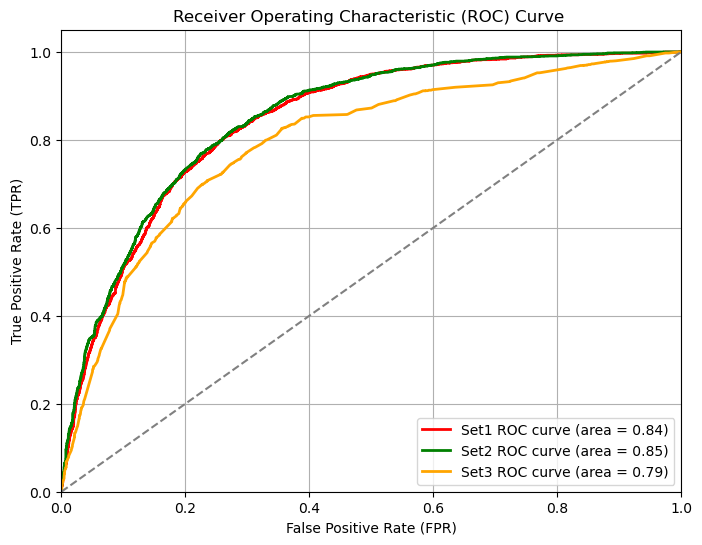

In [66]:
plt.figure(figsize=(8, 6))
#plt.plot(fpr0, tpr0, color='blue', lw=2, label='DefaultSet ROC curve (area = {:.2f})'.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2, label='Set1 ROC curve (area = {:.2f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2, label='Set2 ROC curve (area = {:.2f})'.format(roc_auc2))
plt.plot(fpr3, tpr3, color='orange', lw=2, label='Set3 ROC curve (area = {:.2f})'.format(roc_auc3))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

In [69]:
def SVMmodelTuned(df):
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]

    #Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Standardise the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #Create the SVM model
    svm_model = SVC()

    #Define the hyperparameter grid for Grid Search
    param_grid = {
        'kernel': ['linear','rbf', 'sigmoid'],
        'C':[1]                
    }
    
    class_weight = {0: len(y_train[y_train == 1]) / len(y_train[y_train == 0])}
    svm_model=SVC(class_weight=class_weight)
    #Create the GridSearchCV object with cross-validation
    grid_search = GridSearchCV(svm_model, param_grid,  scoring='accuracy')

    #Fit the grid search object to your data
    grid_search.fit(X_train_scaled, y_train)
    
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    print("Best Parameters:", best_params)
    print("Best Accuracy:", best_accuracy)


In [70]:
SVMmodelTuned(df_set1)

Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Accuracy: 0.7594191206131504


In [71]:
SVMmodelTuned(df_set2)

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Best Accuracy: 0.7657119806373538


In [72]:
SVMmodelTuned(df_set3)

Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Accuracy: 0.7339249697458653


In [ ]:
# accuracy check for improvement
#set 1 OG: 0.767    New:0.759
#set 2 OG: 0.768    New:0.767
#set 3 OG: 0.733    New:0.734

<h1>Logistic Regression

In [228]:
def logisticRegressionModel(df,bal=False):
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]

    #Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Standardising the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Calculating class_weight
    if bal==True:
        class_weight = {0: len(y_train[y_train == 1]) / len(y_train[y_train == 0])}
        logistic_model = LogisticRegression(class_weight=class_weight)
    else:
        logistic_model = LogisticRegression()
    #Training the logistic regression model with class_weight if required    
    logistic_model.fit(X_train_scaled, y_train)

    #Making predictions
    y_pred = logistic_model.predict(X_test_scaled)

    #Evaluating the model and printing evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)    
    sensitivity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
    print('Sensitivity : ', sensitivity)
    print('Specificity : ', specificity)
    
    #Plotting Calibration Curve
    y_pred_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]
    true_prob, pred_prob = calibration_curve(y_test, y_pred_prob, n_bins=10)

    plt.figure(figsize=(8, 6))
    plt.plot(pred_prob, true_prob, marker='o', linestyle='-', color='blue', label='Logistic Regression')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title('Calibration Plot')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    #Plotting ROC curve    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    #Plotting Coefficient Plot
    coef_df = pd.DataFrame(logistic_model.coef_.T, index=X.columns, columns=['Coefficient'])
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(coef_df.index, coef_df['Coefficient'], color='blue')
    plt.xlabel('Coefficient Value')
    plt.title('Logistic Regression Coefficient Plot')
    plt.grid(True)
    plt.show()
    
    return logistic_model, scaler, true_prob, pred_prob, fpr, tpr, roc_auc


Accuracy: 0.7739593417231365
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      3486
           1       0.74      0.75      0.74      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2771  715]
 [ 686 2026]]
Sensitivity :  0.7948938611589214
Specificity :  0.7470501474926253


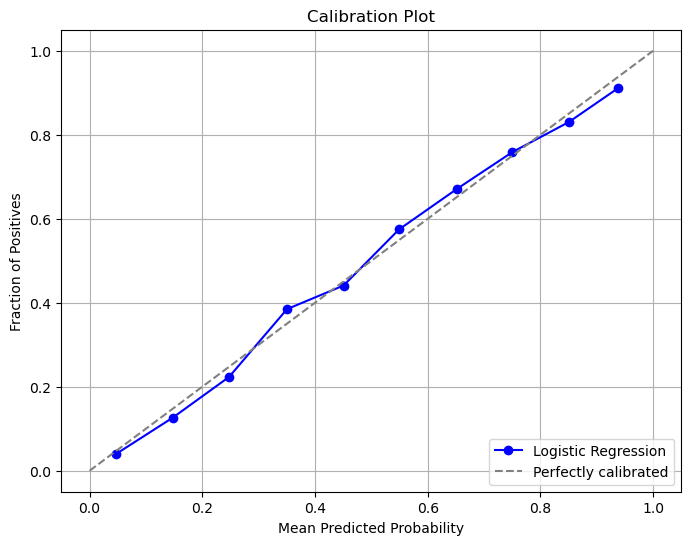

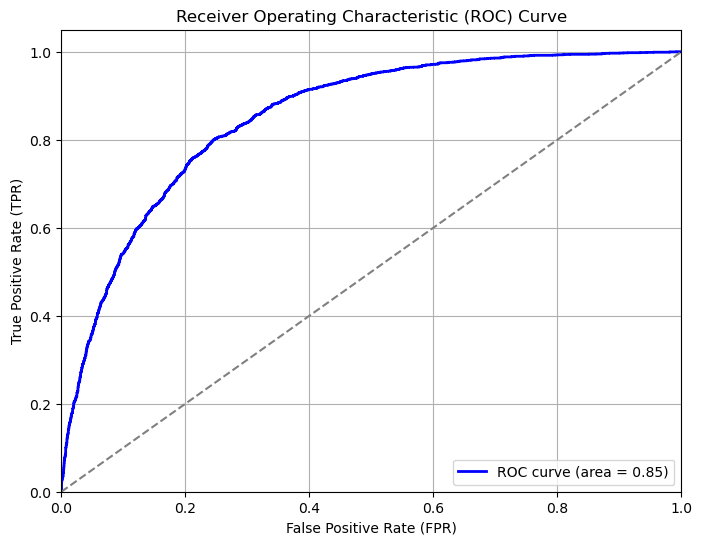

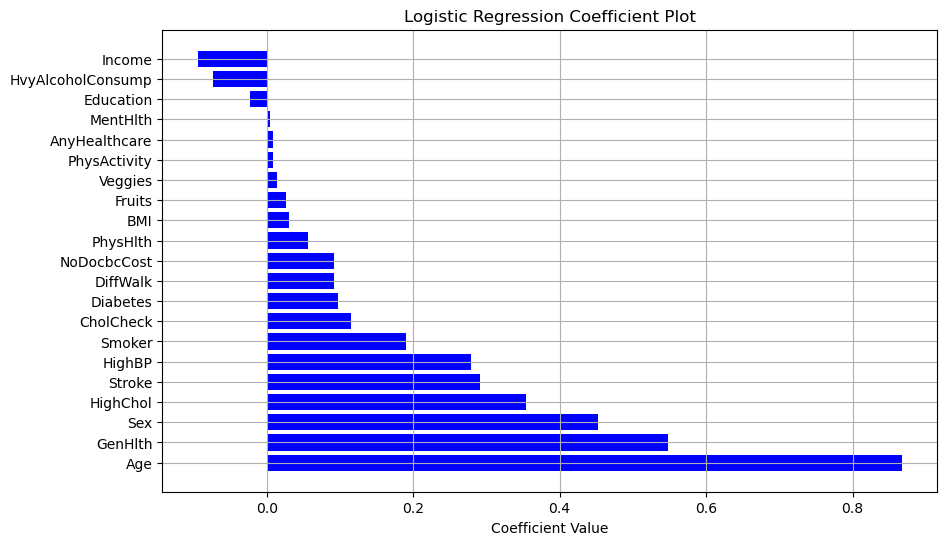

Accuracy on test set
0.7723577235772358


In [229]:
model,scal,tp00,pp00,fpr00,tpr00,roc_auc00=logisticRegressionModel(df_default)
testReg_scal(default_test,scal,model)

Accuracy: 0.7742820264601484
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      3486
           1       0.72      0.80      0.76      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.78      0.77      6198
weighted avg       0.78      0.77      0.78      6198

Confusion Matrix:
[[2639  847]
 [ 552 2160]]
Sensitivity :  0.7570281124497992
Specificity :  0.7964601769911505


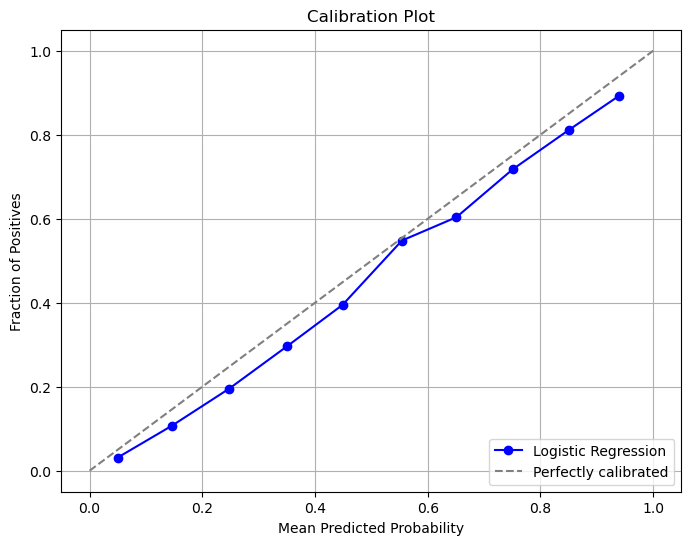

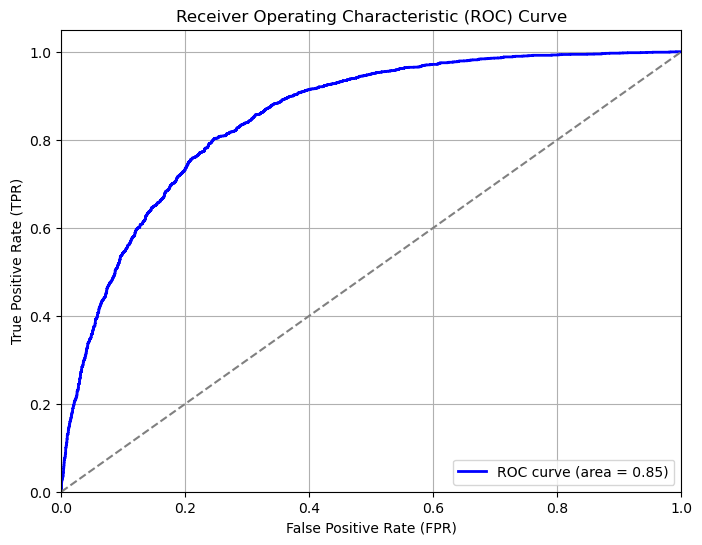

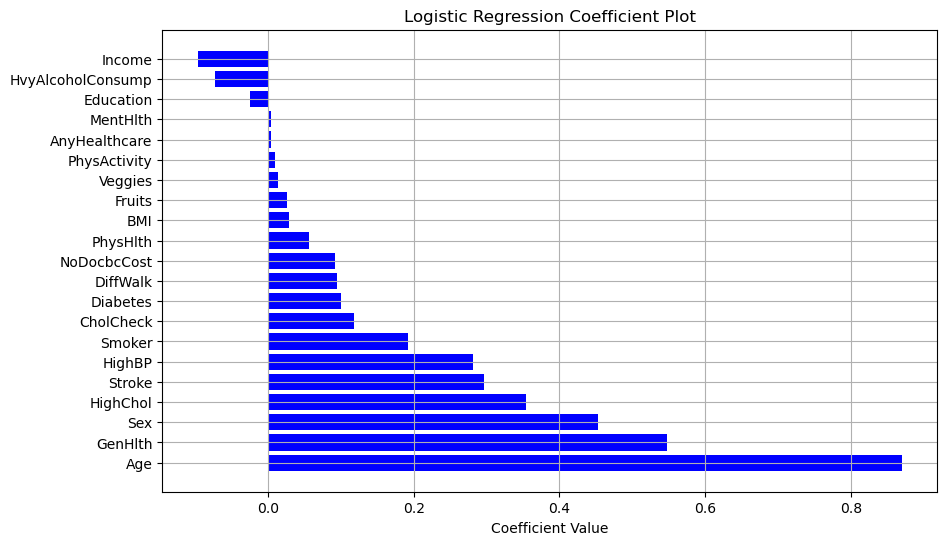

Accuracy on test set
0.7735191637630662


In [230]:
model,scal,tp000,pp000,fpr000,tpr000,roc_auc000=logisticRegressionModel(df_default,bal=True)
testReg_scal(default_test,scal,model)

Accuracy: 0.7670216198773798
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3486
           1       0.73      0.74      0.74      2712

    accuracy                           0.77      6198
   macro avg       0.76      0.76      0.76      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2741  745]
 [ 699 2013]]
Sensitivity :  0.7862880091795754
Specificity :  0.7422566371681416


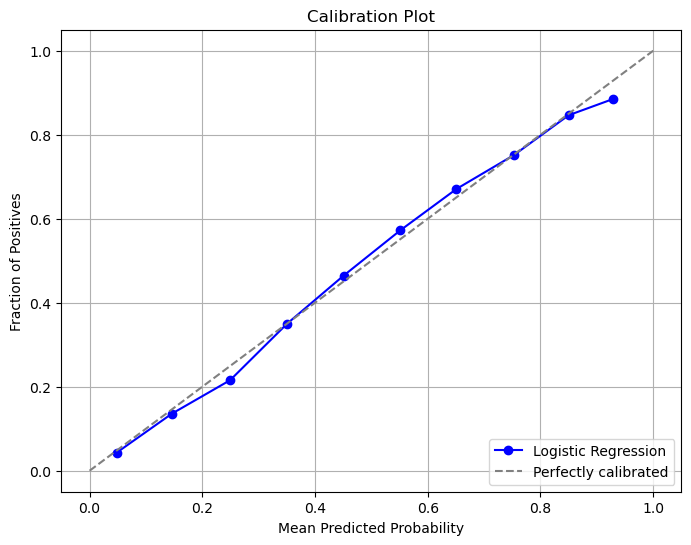

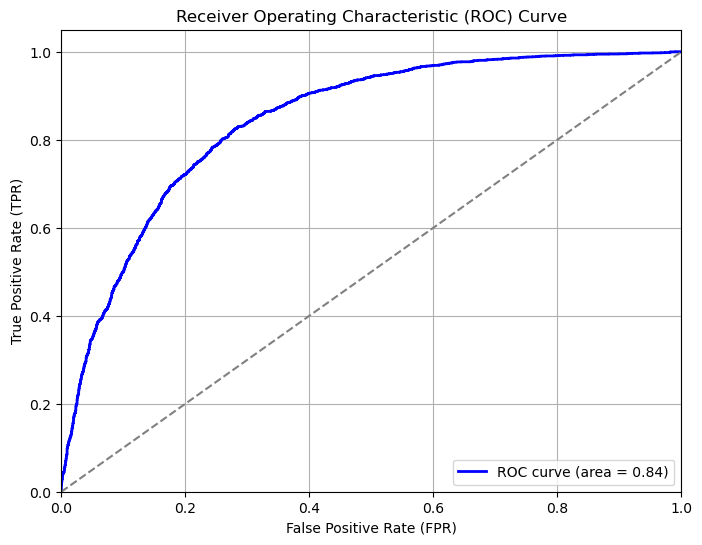

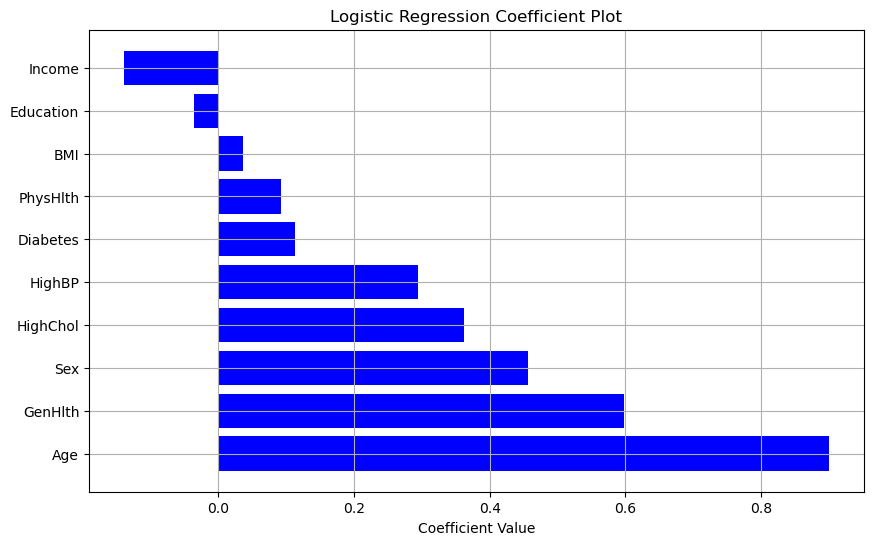

Accuracy on test set
0.7621951219512195


In [231]:
model,scal,tp1,pp1,fpr30,tpr30,roc_auc30=logisticRegressionModel(df_set1)
testReg_scal(set1_test,scal,model)

Accuracy: 0.7665375927718618
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      3486
           1       0.71      0.79      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2595  891]
 [ 556 2156]]
Sensitivity :  0.7444061962134251
Specificity :  0.7949852507374632


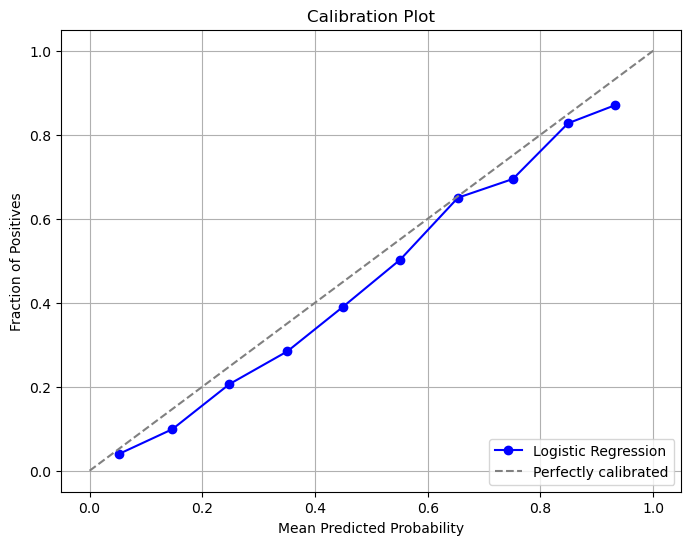

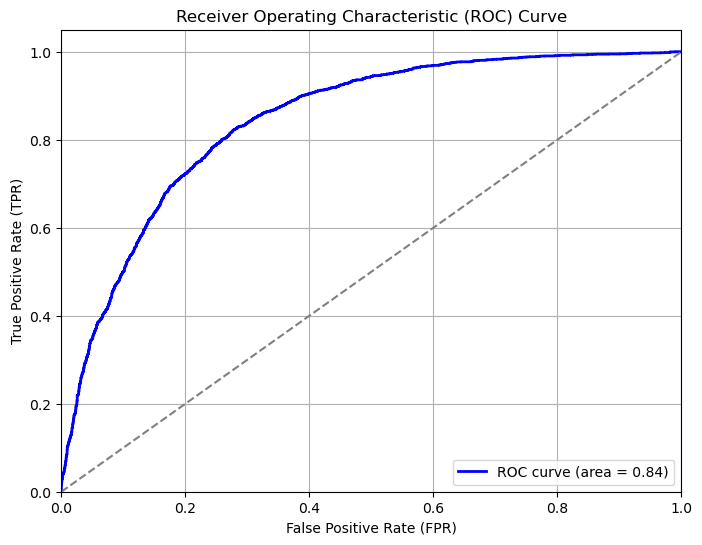

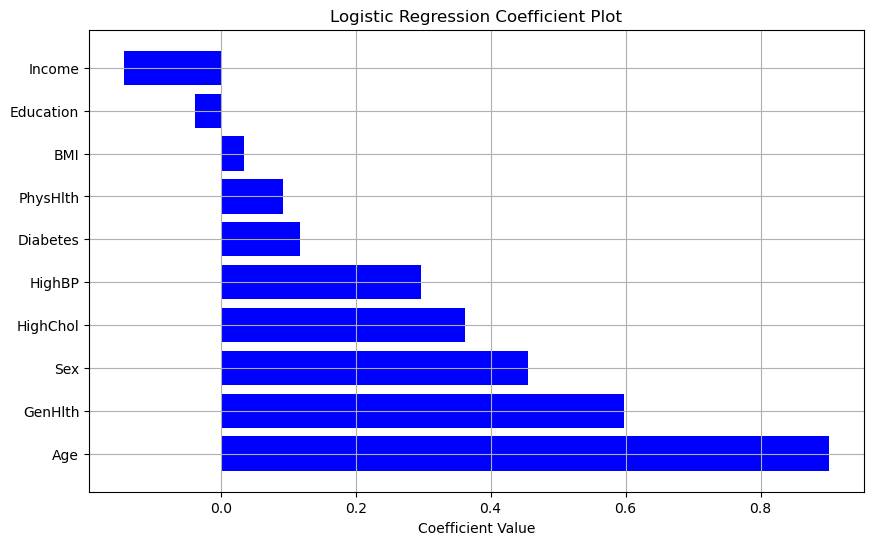

Accuracy on test set
0.7610336817653891


In [232]:
model,scal,tp10,pp10,fpr35,tpr35,roc_auc35=logisticRegressionModel(df_set1,bal=True)
testReg_scal(set1_test,scal,model)

Accuracy: 0.7704098096160051
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3486
           1       0.74      0.74      0.74      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2777  709]
 [ 714 1998]]
Sensitivity :  0.7966150315547906
Specificity :  0.7367256637168141


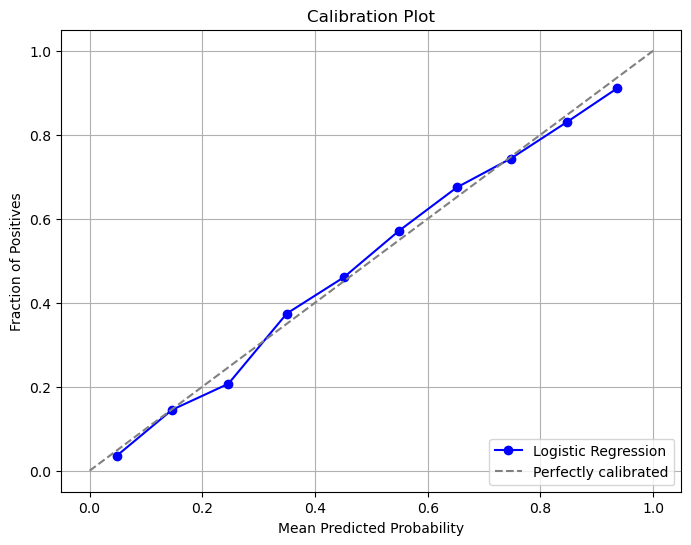

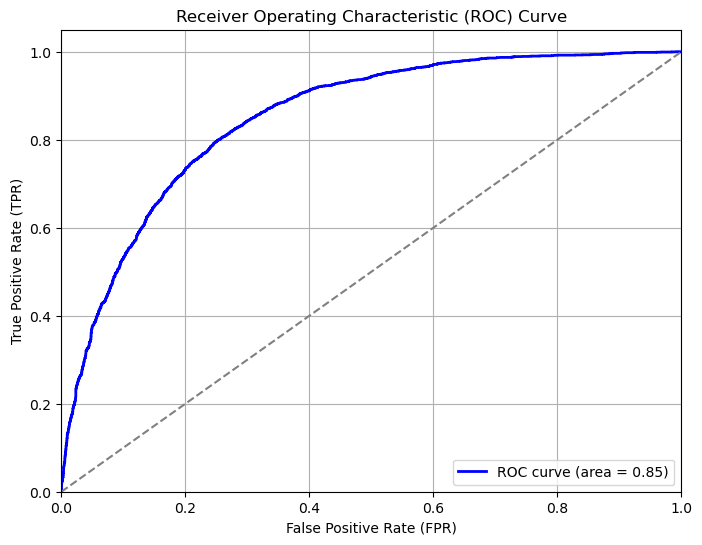

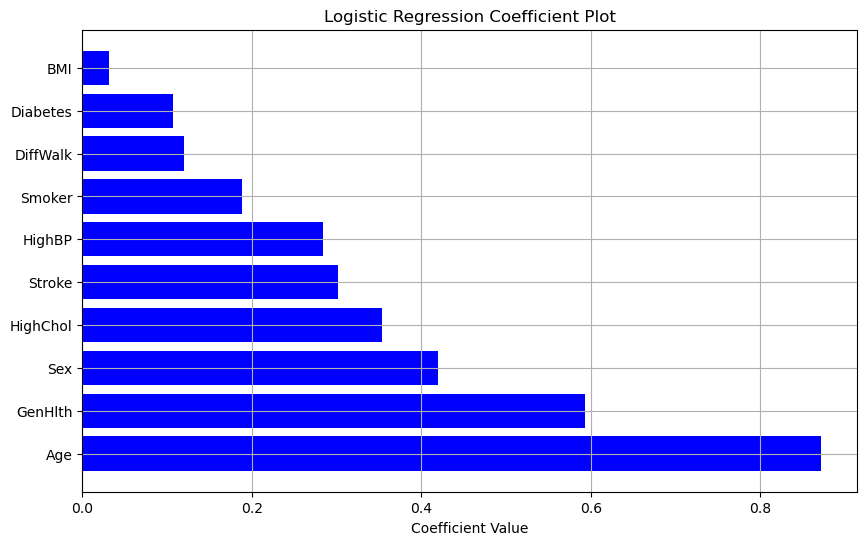

Accuracy on test set
0.769163763066202


In [233]:
model,scal,tp2,pp2,fpr40,tpr40,roc_auc40=logisticRegressionModel(df_set2)
testReg_scal(set2_test,scal,model)

Accuracy: 0.7699257825104873
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79      3486
           1       0.71      0.79      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.78      0.77      0.77      6198

Confusion Matrix:
[[2620  866]
 [ 560 2152]]
Sensitivity :  0.7515777395295468
Specificity :  0.7935103244837758


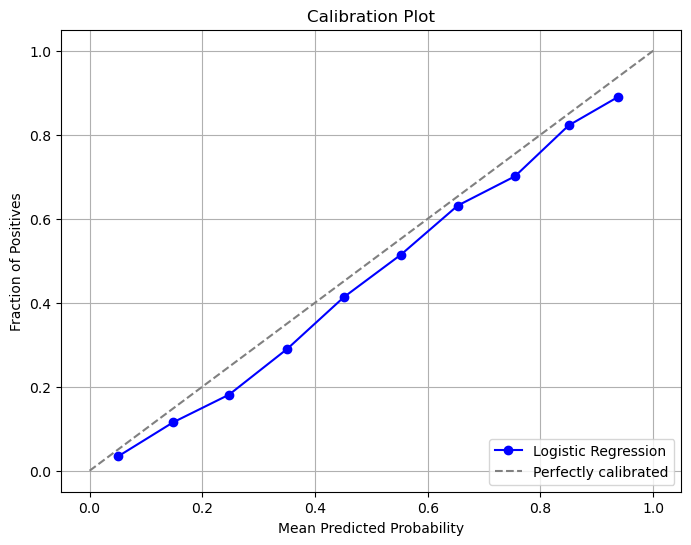

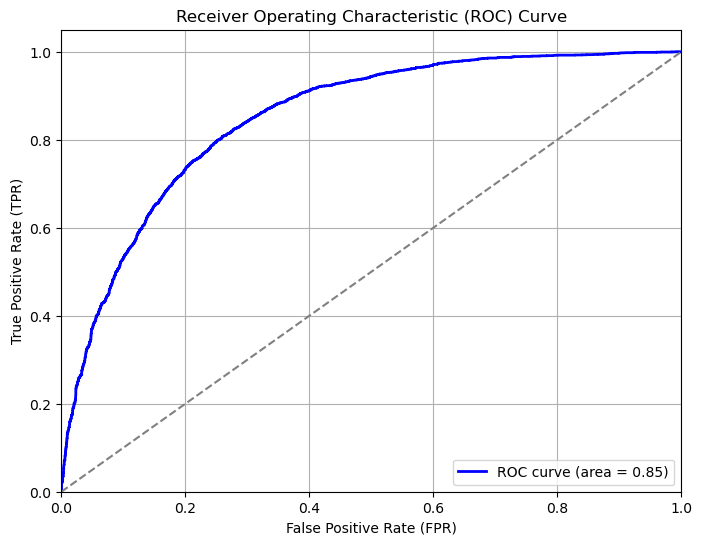

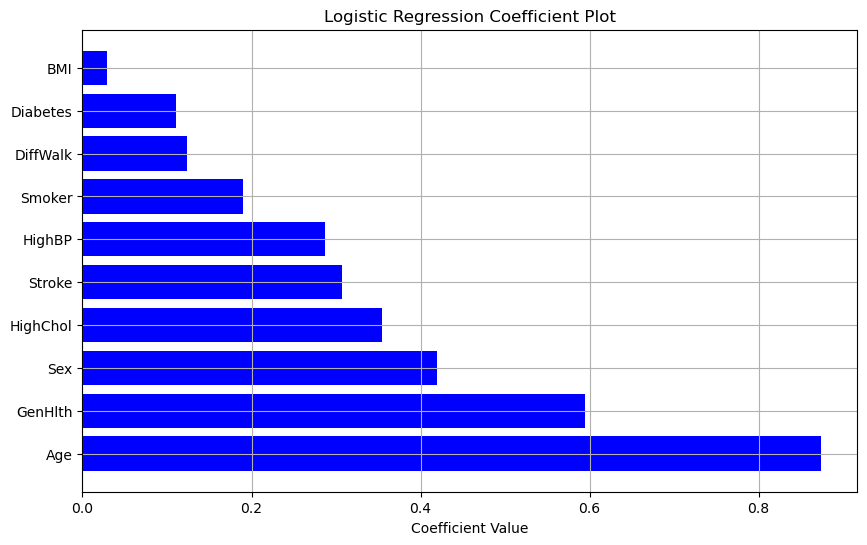

Accuracy on test set
0.7738095238095238


In [234]:
model,scal,tp20,pp20,fpr41,tpr41,roc_auc41=logisticRegressionModel(df_set2,bal=True)
testReg_scal(set2_test,scal,model)

Accuracy: 0.7387867053888351
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3486
           1       0.71      0.68      0.70      2712

    accuracy                           0.74      6198
   macro avg       0.73      0.73      0.73      6198
weighted avg       0.74      0.74      0.74      6198

Confusion Matrix:
[[2726  760]
 [ 859 1853]]
Sensitivity :  0.7819850831899025
Specificity :  0.6832595870206489


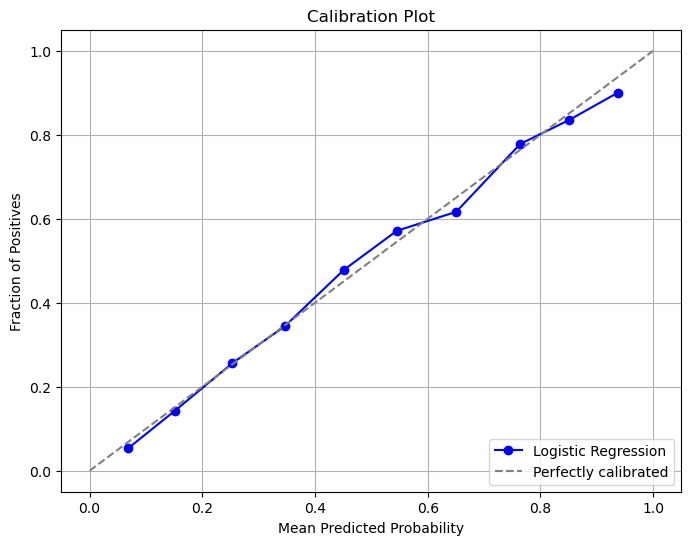

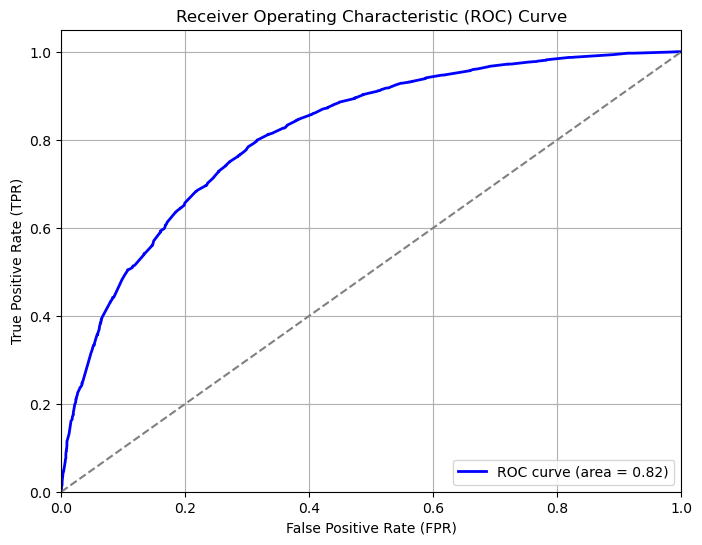

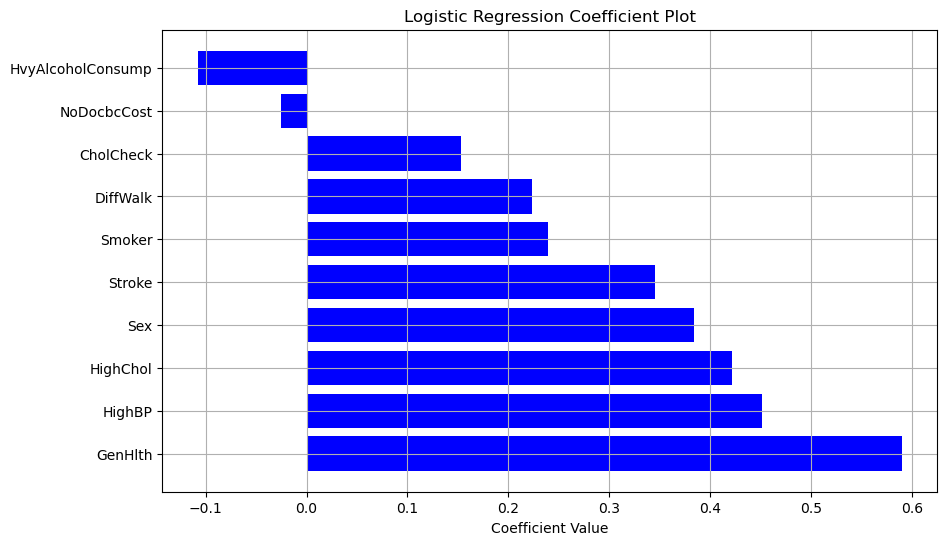

Accuracy on test set
0.7389663182346109


In [235]:
model,scal,tp3,pp3,fpr42,tpr42,roc_auc42=logisticRegressionModel(df_set3)
testReg_scal(set3_test,scal,model)

Accuracy: 0.7381413359148112
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      3486
           1       0.68      0.75      0.71      2712

    accuracy                           0.74      6198
   macro avg       0.74      0.74      0.74      6198
weighted avg       0.74      0.74      0.74      6198

Confusion Matrix:
[[2541  945]
 [ 678 2034]]
Sensitivity :  0.7289156626506024
Specificity :  0.75


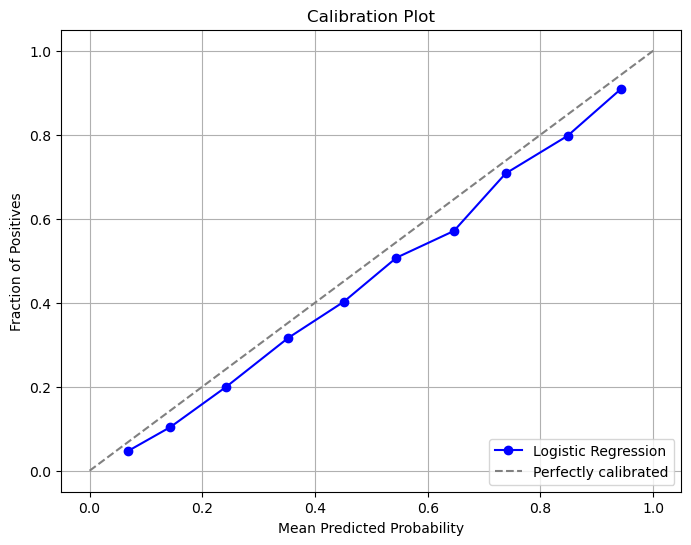

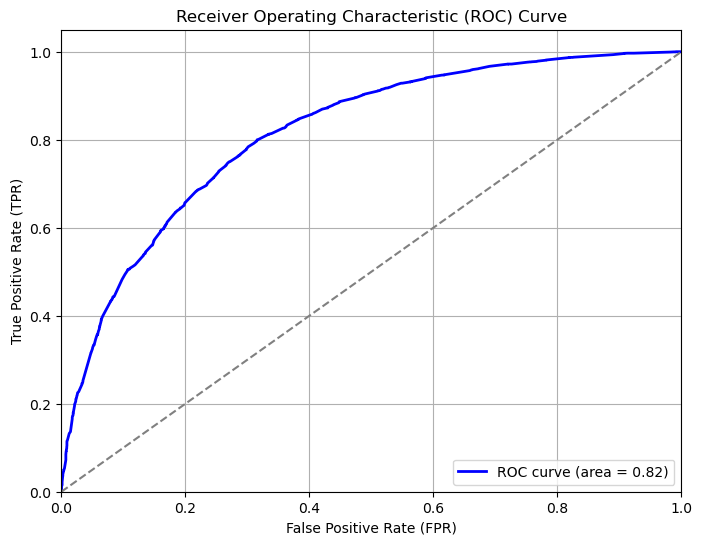

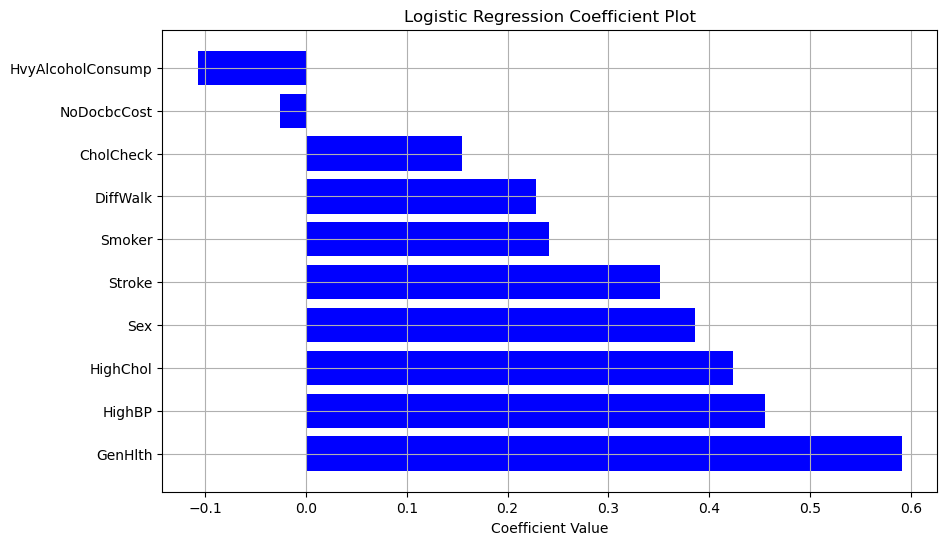

Accuracy on test set
0.7378048780487805


In [236]:
model,scal,tp30,pp30,fpr5,tpr5,roc_auc5=logisticRegressionModel(df_set3,bal=True)
testReg_scal(set3_test,scal,model)

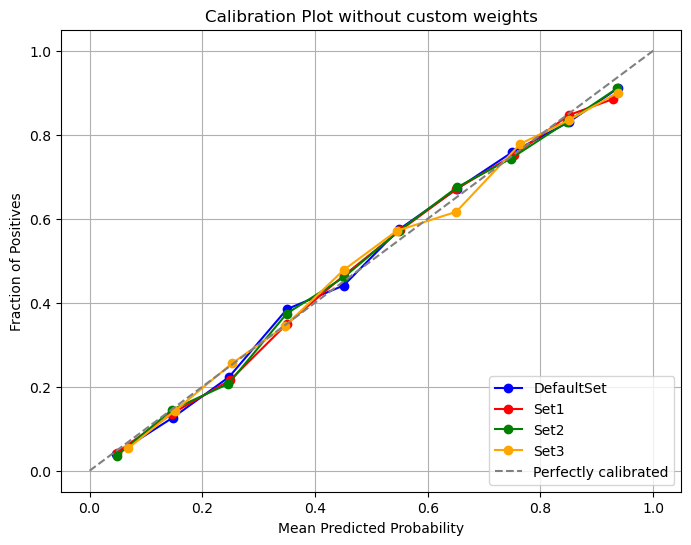

In [237]:
plt.figure(figsize=(8, 6))
plt.plot(pp00, tp00, marker='o', linestyle='-', color='blue', label='DefaultSet')
plt.plot(pp1, tp1, marker='o', linestyle='-', color='red', label='Set1')
plt.plot(pp2, tp2, marker='o', linestyle='-', color='green', label='Set2')
plt.plot(pp3, tp3, marker='o', linestyle='-', color='orange', label='Set3')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot without custom weights')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

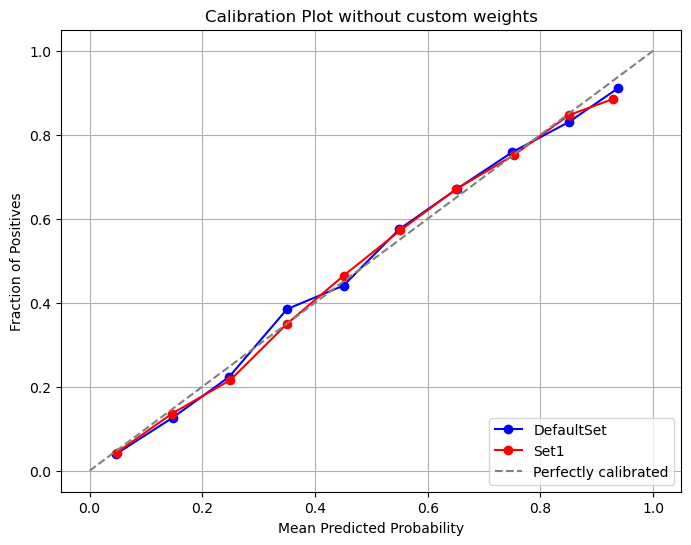

In [238]:
plt.figure(figsize=(8, 6))
plt.plot(pp00, tp00, marker='o', linestyle='-', color='blue', label='DefaultSet')
plt.plot(pp1, tp1, marker='o', linestyle='-', color='red', label='Set1')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot without custom weights')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

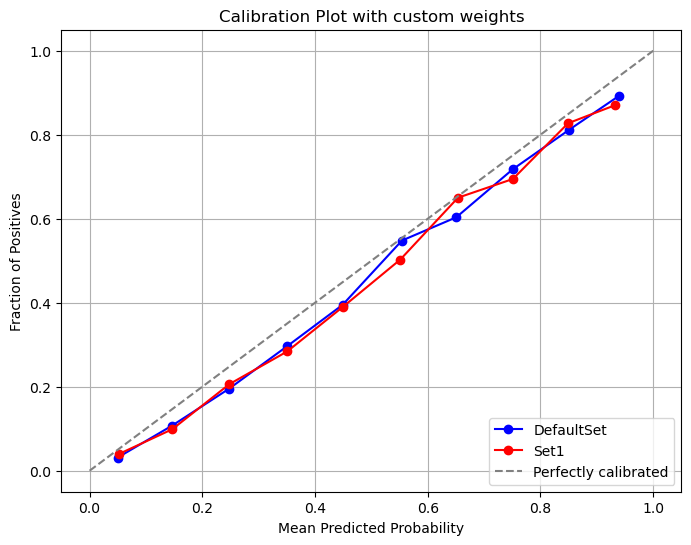

In [239]:
plt.figure(figsize=(8, 6))
plt.plot(pp000, tp000, marker='o', linestyle='-', color='blue', label='DefaultSet')
plt.plot(pp10, tp10, marker='o', linestyle='-', color='red', label='Set1')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot with custom weights')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

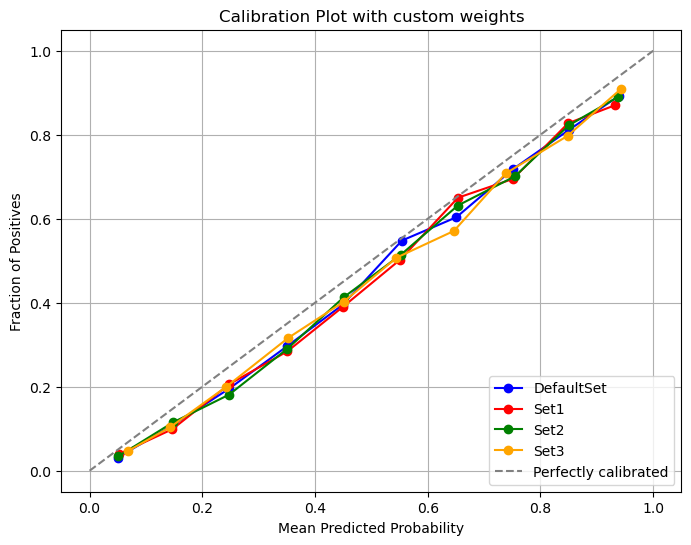

In [240]:
plt.figure(figsize=(8, 6))
plt.plot(pp000, tp000, marker='o', linestyle='-', color='blue', label='DefaultSet')
plt.plot(pp10, tp10, marker='o', linestyle='-', color='red', label='Set1')
plt.plot(pp20, tp20, marker='o', linestyle='-', color='green', label='Set2')
plt.plot(pp30, tp30, marker='o', linestyle='-', color='orange', label='Set3')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot with custom weights')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [241]:
#from the above two, calibrations plots closer to the dashed line
# ('perfectly calibrated' line) is optimal,
# we can clearly see, that the model works better without a custom weight
# the custom weight mentioned tries to give more weight to positive class

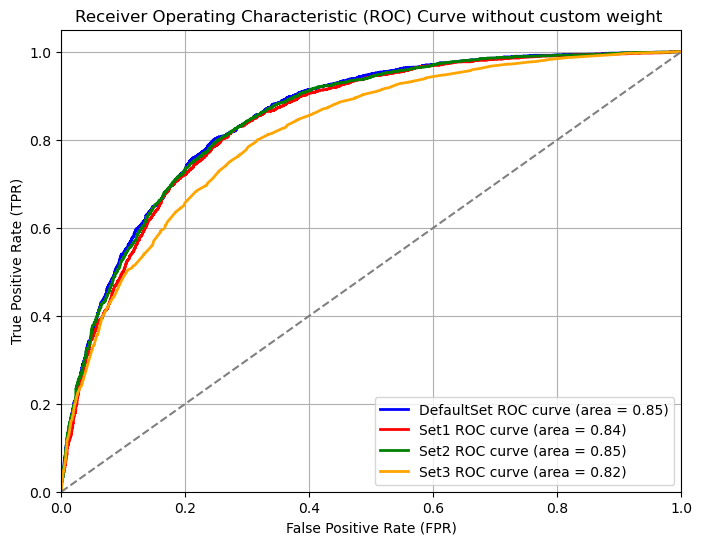

In [242]:
plt.figure(figsize=(8, 6))
plt.plot(fpr00, tpr00, color='blue', lw=2, label='DefaultSet ROC curve (area = {:.2f})'.format(roc_auc00))
plt.plot(fpr30, tpr30, color='red', lw=2, label='Set1 ROC curve (area = {:.2f})'.format(roc_auc30))
plt.plot(fpr40, tpr40, color='green', lw=2, label='Set2 ROC curve (area = {:.2f})'.format(roc_auc40))
plt.plot(fpr42, tpr42, color='orange', lw=2, label='Set3 ROC curve (area = {:.2f})'.format(roc_auc42))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve without custom weight ')
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

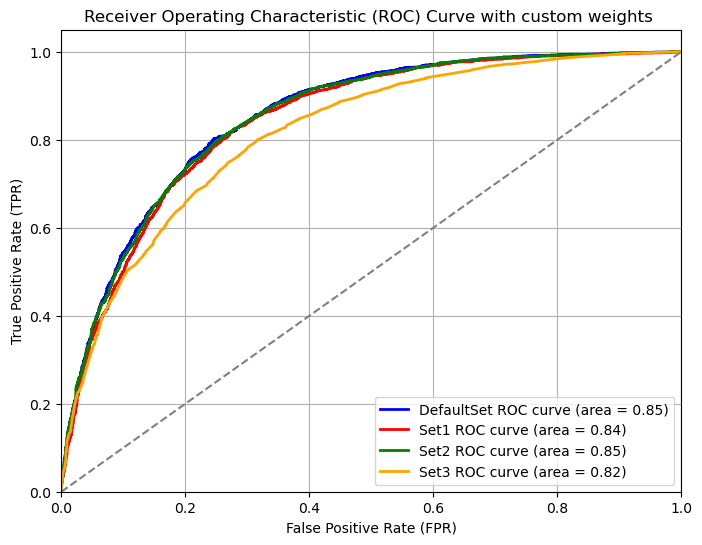

In [244]:
plt.figure(figsize=(8, 6))
plt.plot(fpr000, tpr000, color='blue', lw=2, label='DefaultSet ROC curve (area = {:.2f})'.format(roc_auc000))
plt.plot(fpr35, tpr35, color='red', lw=2, label='Set1 ROC curve (area = {:.2f})'.format(roc_auc35))
plt.plot(fpr41, tpr41, color='green', lw=2, label='Set2 ROC curve (area = {:.2f})'.format(roc_auc41))
plt.plot(fpr5, tpr5, color='orange', lw=2, label='Set3 ROC curve (area = {:.2f})'.format(roc_auc5))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve with custom weights ')
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

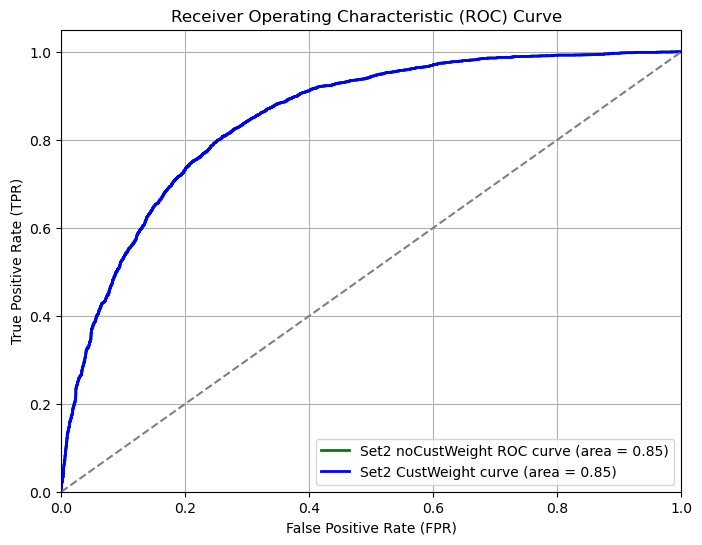

In [245]:
plt.figure(figsize=(8, 6))
plt.plot(fpr40, tpr40, color='green', lw=2, label='Set2 noCustWeight ROC curve (area = {:.2f})'.format(roc_auc40))
plt.plot(fpr41, tpr41, color='blue', lw=2, label='Set2 CustWeight curve (area = {:.2f})'.format(roc_auc41))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve  ')
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

In [246]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def logisticRegressionModelWithGridSearch(df,bal=True):
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]

    #Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Standardise the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create the logistic regression model
    if bal==True:
        class_weight = {0: len(y_train[y_train == 1]) / len(y_train[y_train == 0])}
        logistic_model = LogisticRegression(class_weight=class_weight)
    else:
        logistic_model = LogisticRegression()

    #Define the hyperparameter grid to search
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
        'penalty': ['l1', 'l2','elasticnet'],  # Regularization type (L1 or L2)
        'solver': ['liblinear', 'saga','lbfgs','newton-cg'], # Optimization algorithm
        
    }
    
    param_grid['l1_ratio'] = [0.3, 0.5, 0.7] if 'elasticnet' in param_grid['penalty'] else [None]


    #Create the GridSearchCV object with cross-validation
    grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

    #Fit the grid search object to your data
    grid_search.fit(X_train_scaled, y_train)

    #Get the best hyperparameters and the corresponding accuracy
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    print('Best Parameters', best_params)
    print('Accuracy', best_accuracy)


In [87]:
logisticRegressionModelWithGridSearch(df_set1,bal=False)

Best Parameters {'C': 0.1, 'l1_ratio': 0.3, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy 0.7636950383219039


In [91]:
logisticRegressionModelWithGridSearch(df_set2,bal=False)

Best Parameters {'C': 0.1, 'l1_ratio': 0.3, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy 0.7702299314239613


In [92]:
#without custom weight
#original training accuracy: 0.7699
#grid-search best accuracy: 0.771

In [95]:
logisticRegressionModelWithGridSearch(df_set3,bal=False)

Best Parameters {'C': 0.01, 'l1_ratio': 0.3, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy 0.7432029043969343


In [96]:
#without custom weights
#original training accuracy: 0.738
#grid-search best accuracy: 0.743

In [145]:
def LRgridSearchV2(df,bal=True):
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]

    #Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Standardising the data (optional)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #Creating the logistic regression model with or without custom weights as required
    if bal==True:
        class_weight = {0: len(y_train[y_train == 1]) / len(y_train[y_train == 0])}
        logistic_model = LogisticRegression(class_weight=class_weight)
    else:
        logistic_model = LogisticRegression()

    #Defining the hyperparameter grid to search
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
        'penalty': ['l1', 'l2'],  # Regularization type (L1 or L2)
        'solver': ['liblinear', 'saga','lbfgs','newton-cg'], # Optimization algorithm
        
    }
    
    #param_grid['l1_ratio'] = [0.3, 0.5, 0.7] if 'elasticnet' in param_grid['penalty'] else [None]


    #Creatingthe GridSearchCV object with cross-validation
    grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

    #Fitting the grid search object to your data
    grid_search.fit(X_train_scaled, y_train)

    #Getting the best hyperparameters and the corresponding accuracy
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    print('Best Parameters', best_params)
    print('Accuracy', best_accuracy)


In [146]:
LRgridSearchV2(df_set1, bal=False)

Best Parameters {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy 0.7636950383219039


In [147]:
LRgridSearchV2(df_set2, bal=False)

Best Parameters {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy 0.7702299314239613


In [148]:
LRgridSearchV2(df_set3, bal=False)

Best Parameters {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy 0.7432029043969343


In [110]:
def LRcustThres(df, threshold=0.5):
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]

    #Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    

    #Create and train the logistic regression model
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)

    #Make predictions with probabilities
    y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

    #Adjusting the threshold
    y_pred_custom_threshold = (y_pred_prob >= threshold).astype(int)

    #Evaluate the model with the custom threshold
    accuracy = accuracy_score(y_test, y_pred_custom_threshold)
    print("Accuracy:", accuracy)

    print("Classification Report:")
    conf_matrix=confusion_matrix(y_test, y_pred_custom_threshold)
    print(conf_matrix)
    
    sensitivity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

    print('Sensitivity : ', sensitivity)
    print('Specificity : ', specificity)

    return logistic_model


In [111]:
#from prev experiments we know the value for threshold to be abve 0.4 and
#below 0.5
i=0
thres=0.4
for i in range(10):
    print('threshold = ',thres)
    model=LRcustThres(df_set1,threshold=thres)
    testThres(set1_test,model,threshold=thres)
    thres+=0.01
    print()

threshold =  0.4
Accuracy: 0.7612132946111649
Classification Report:
[[2455 1031]
 [ 449 2263]]
Sensitivity :  0.704245553643144
Specificity :  0.8344395280235988
Test Accuracy 0.7552264808362369

threshold =  0.41000000000000003
Accuracy: 0.7647628267182962
Classification Report:
[[2490  996]
 [ 462 2250]]
Sensitivity :  0.7142857142857143
Specificity :  0.8296460176991151
Test Accuracy 0.7563879210220673

threshold =  0.42000000000000004
Accuracy: 0.7652468538238142
Classification Report:
[[2519  967]
 [ 488 2224]]
Sensitivity :  0.7226047045324153
Specificity :  0.8200589970501475
Test Accuracy 0.7578397212543554

threshold =  0.43000000000000005
Accuracy: 0.7652468538238142
Classification Report:
[[2547  939]
 [ 516 2196]]
Sensitivity :  0.7306368330464716
Specificity :  0.8097345132743363
Test Accuracy 0.7587108013937283

threshold =  0.44000000000000006
Accuracy: 0.7668602775088739
Classification Report:
[[2578  908]
 [ 537 2175]]
Sensitivity :  0.7395295467584624
Specificity :  

In [150]:
model=LRcustThres(df_set1,threshold=0.5)#default threshold
testThres(set1_test,model,threshold=0.5)

Accuracy: 0.7670216198773798
Classification Report:
[[2741  745]
 [ 699 2013]]
Sensitivity :  0.7862880091795754
Specificity :  0.7422566371681416
Test Accuracy 0.7621951219512195


In [113]:
#0.46 best set1 logisticRegression OG: FN-699 FP-745 New: FN-590 FP-852
#0.46 best set2 logisticRegression OG: FN-713 FP-709 New: FN-591 FP-837
#0.46 best set3 logisticRegression OG: FN-855 FP-764 New: FN-738 FP-885


In [114]:
i=0
thres=0.4
for i in range(10):
    print('threshold = ',thres)
    model=LRcustThres(df_set2,threshold=thres)
    testThres(set2_test,model,threshold=thres)
    thres+=0.01
    print()

threshold =  0.4
Accuracy: 0.7634720877702484
Classification Report:
[[2477 1009]
 [ 457 2255]]
Sensitivity :  0.710556511761331
Specificity :  0.8314896755162242
Test Accuracy 0.7677119628339141

threshold =  0.41000000000000003
Accuracy: 0.766053565666344
Classification Report:
[[2523  963]
 [ 487 2225]]
Sensitivity :  0.7237521514629949
Specificity :  0.8204277286135693
Test Accuracy 0.7700348432055749

threshold =  0.42000000000000004
Accuracy: 0.7673443046143917
Classification Report:
[[2558  928]
 [ 514 2198]]
Sensitivity :  0.7337923121055652
Specificity :  0.81047197640118
Test Accuracy 0.7723577235772358

threshold =  0.43000000000000005
Accuracy: 0.7687963859309455
Classification Report:
[[2589  897]
 [ 536 2176]]
Sensitivity :  0.7426850258175559
Specificity :  0.8023598820058997
Test Accuracy 0.7723577235772358

threshold =  0.44000000000000006
Accuracy: 0.7700871248789932
Classification Report:
[[2613  873]
 [ 552 2160]]
Sensitivity :  0.7495697074010327
Specificity :  0.7

In [151]:
model=LRcustThres(df_set2,threshold=0.5)  #default threshold
testThres(set2_test,model,threshold=0.5)

Accuracy: 0.7705711519845111
Classification Report:
[[2777  709]
 [ 713 1999]]
Sensitivity :  0.7966150315547906
Specificity :  0.737094395280236
Test Accuracy 0.7688734030197445


In [116]:
i=0
thres=0.4
for i in range(10):
    print('threshold = ',thres)
    model=LRcustThres(df_set3,threshold=thres)
    testThres(set3_test,model,threshold=thres)
    thres+=0.01
    print()

threshold =  0.4
Accuracy: 0.7344304614391739
Classification Report:
[[2405 1081]
 [ 565 2147]]
Sensitivity :  0.6899024670109007
Specificity :  0.7916666666666666
Test Accuracy 0.7383855981416957

threshold =  0.41000000000000003
Accuracy: 0.7355598580187157
Classification Report:
[[2438 1048]
 [ 591 2121]]
Sensitivity :  0.6993689041881813
Specificity :  0.7820796460176991
Test Accuracy 0.7427409988385598

threshold =  0.42000000000000004
Accuracy: 0.7355598580187157
Classification Report:
[[2479 1007]
 [ 632 2080]]
Sensitivity :  0.7111302352266208
Specificity :  0.7669616519174042
Test Accuracy 0.7424506387921022

threshold =  0.43000000000000005
Accuracy: 0.7355598580187157
Classification Report:
[[2485 1001]
 [ 638 2074]]
Sensitivity :  0.7128514056224899
Specificity :  0.7647492625368731
Test Accuracy 0.7421602787456446

threshold =  0.44000000000000006
Accuracy: 0.7360438851242336
Classification Report:
[[2495  991]
 [ 645 2067]]
Sensitivity :  0.7157200229489387
Specificity : 

In [152]:
model=LRcustThres(df_set3,threshold=0.5)  #default threshold
testThres(set3_test,model,threshold=0.5)

Accuracy: 0.7387867053888351
Classification Report:
[[2722  764]
 [ 855 1857]]
Sensitivity :  0.780837636259323
Specificity :  0.6847345132743363
Test Accuracy 0.7380952380952381


<h1> Hybrid Models

In [ ]:
#0.46 best set1 logisticRegression OG: FN-699 FP-745 New: FN-590 FP-852
#0.46 best set2 logisticRegression OG: FN-713 FP-709 New: FN-591 FP-837
#0.46 best set3 logisticRegression OG: FN-855 FP-764 New: FN-738 FP-885

#0.46 for set1 SVM OG: FN-689 FP-757 New: FN-588 FP-861
#0.45 for set2 SVM OG: FN-700 FP-725 New: FN-588 FP-842
#0.40 for set3 SVM OG: FN-833 FP-776 New: FN-754 FP-900

#0.46 best set1 xgboost OG: FN-507 FP-939 New: FN-419 FP-1050
#0.45 best set2 xgboost OG: FN-519 FP-914 New: FN-416 FP-1045
#0.46 best set3 xgboost OG: FN-645 FP-995 New: FN-528 FP-1135

#0.46 for set1 KNN OG: FN-724 FP-765 New: FN-562 FP-946
#0.46 for set2 KNN OG: FN-710 FP-773 New: FN-548 FP-944
#0.46 for set3 KNN OG: FN-703 FP-1038 New: FN-612 FP-1186

#SET2 has overall the least FN, hence we will use only set 2 to train the hybrid ml models

In [ ]:
def custom_threshold_predict(model, X, threshold):
    # Getting the predicted probabilities
    y_pred_prob = model.predict_proba(X)[:, 1]
    
    # Applying the custom threshold
    y_pred_custom = (y_pred_prob >= threshold).astype(int)
    return y_pred_custom

In [199]:
#Ensemble ML Model
def stacking_model_with_threshold(df, dfTest,cvPrint=False, threshold=0.5,stack=1):
    target = 'HeartDiseaseorAttack'
    X = df.drop(target, axis=1)
    y = df[target]
    X_unseen=dfTest.drop(target, axis=1)
    y_unseen=dfTest[target]
    #Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Preprocess the data # removed due to showing no positive imporvements
    scaler = StandardScaler()
    X_train_scaled = X_train #scaler.fit_transform(X_train)
    X_test_scaled = X_test #scaler.transform(X_test)

    #Create the base models
    if stack==1:
        base_models = [
            ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary:logistic'))
        ]
    elif stack==2:
        base_models = [
            ('knn', KNeighborsClassifier(n_neighbors=15)),
            ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary:logistic'))
        ]
    elif stack==3:
        base_models = [
            ('knn', KNeighborsClassifier(n_neighbors=15)),
            ('svm', SVC(kernel='rbf', probability=True)),
            ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary:logistic'))
        ]


    #Creating the stacking classifier with logistic regression as meta-model
    meta_model = LogisticRegression()
    stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=10)

    #Fit the stacking model with custom threshold
    stack_model.fit(X_train_scaled, y_train)
    y_pred_custom = custom_threshold_predict(stack_model, X_test_scaled, threshold)
    y_pred_unseen = custom_threshold_predict(stack_model, X_unseen, threshold)
    
    #Evaluate the model with custom threshold and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_custom)
    print("Train Accuracy:", accuracy)
    accuracyTest = accuracy_score(y_unseen, y_pred_unseen)
    print("Test Accuracy:", accuracyTest)
    print("Classification Report:")
    print(classification_report(y_test, y_pred_custom))
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred_custom)
    print(conf_matrix)
    sensitivity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
    print('Sensitivity : ', sensitivity)
    print('Specificity : ', specificity)
    #Print 10 cv average accuracy if necessary 
    if cvPrint==True:
        cv_scores = cross_val_score(stack_model, X_train_scaled, y_train, cv=10)
        print("Cross-validation Accuracy Scores:", cv_scores)
        print("Mean Accuracy:", np.mean(cv_scores))
    y_pred_prob = stack_model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    return fpr,tpr,roc_auc


In [216]:
fpr50,tpr50,roc_auc50=stacking_model_with_threshold(df_set2,set2_test)

Train Accuracy: 0.7726686027750888
Test Accuracy: 0.775842044134727
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      3486
           1       0.73      0.75      0.74      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2750  736]
 [ 673 2039]]
Sensitivity :  0.7888697647733792
Specificity :  0.7518436578171092


In [222]:
fpr51,tpr51,roc_auc51=stacking_model_with_threshold(df_set2,set2_test,stack=2)

Train Accuracy: 0.7721845756695709
Test Accuracy: 0.7746806039488966
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      3486
           1       0.74      0.75      0.74      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2756  730]
 [ 682 2030]]
Sensitivity :  0.7905909351692484
Specificity :  0.7485250737463127


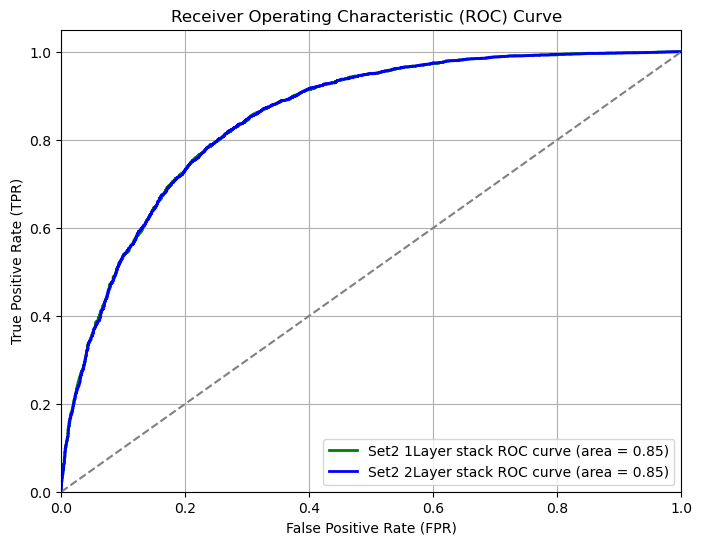

In [223]:
plt.figure(figsize=(8, 6))
plt.plot(fpr50, tpr50, color='green', lw=2, label='Set2 1Layer stack ROC curve (area = {:.2f})'.format(roc_auc50))
plt.plot(fpr51, tpr51, color='blue', lw=2, label='Set2 2Layer stack ROC curve (area = {:.2f})'.format(roc_auc51))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve  ')
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

In [196]:
var=stacking_model_with_threshold(df_set2,set2_test, threshold=0.45)

Train Accuracy: 0.771216521458535
Test Accuracy: 0.7746806039488966
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3486
           1       0.72      0.78      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.78      0.77      0.77      6198

Confusion Matrix:
[[2654  832]
 [ 586 2126]]
Sensitivity :  0.7613310384394721
Specificity :  0.7839233038348082


In [166]:
var=stacking_model_with_threshold(df_set2,set2_test, threshold=0.46)

Train Accuracy: 0.7717005485640529
Test Accuracy: 0.7761324041811847
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      3486
           1       0.72      0.78      0.75      2712

    accuracy                           0.77      6198
   macro avg       0.77      0.77      0.77      6198
weighted avg       0.77      0.77      0.77      6198

Confusion Matrix:
[[2674  812]
 [ 603 2109]]
Sensitivity :  0.7670682730923695
Specificity :  0.7776548672566371


In [164]:
i=0
thres=0.3
for i in range(20):
    print('threshold = ',thres)
    var=stacking_model_with_threshold(df_set2,set2_test,threshold=thres)    
    thres+=0.01
    print()

threshold =  0.3
Train Accuracy: 0.7565343659244917
Test Accuracy: 0.7575493612078978
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      3486
           1       0.67      0.88      0.76      2712

    accuracy                           0.76      6198
   macro avg       0.77      0.77      0.76      6198
weighted avg       0.78      0.76      0.76      6198

Confusion Matrix:
[[2315 1171]
 [ 338 2374]]
Sensitivity :  0.6640849110728628
Specificity :  0.8753687315634219

threshold =  0.31
Train Accuracy: 0.7587931590835754
Test Accuracy: 0.7604529616724739
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      3486
           1       0.67      0.87      0.76      2712

    accuracy                           0.76      6198
   macro avg       0.77      0.77      0.76      6198
weighted avg       0.78      0.76      0.76      6198

Confusion Mat

In [207]:
i=0
thres=0.3
for i in range(20):
    print('threshold = ',thres)
    var=stacking_model_with_threshold(df_set2,set2_test,threshold=thres,stack=2)    
    thres+=0.01
    print()

threshold =  0.3
Train Accuracy: 0.7563730235559858
Test Accuracy: 0.758130081300813
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      3486
           1       0.67      0.88      0.76      2712

    accuracy                           0.76      6198
   macro avg       0.77      0.77      0.76      6198
weighted avg       0.78      0.76      0.76      6198

Confusion Matrix:
[[2314 1172]
 [ 338 2374]]
Sensitivity :  0.663798049340218
Specificity :  0.8753687315634219

threshold =  0.31
Train Accuracy: 0.7594385285575992
Test Accuracy: 0.7616144018583043
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      3486
           1       0.67      0.87      0.76      2712

    accuracy                           0.76      6198
   macro avg       0.77      0.77      0.76      6198
weighted avg       0.78      0.76      0.76      6198

Confusion Matri

In [ ]:
!pip install tpot

In [310]:
from tpot import TPOTClassifier
from tpot.config import classifier_config_dict

In [311]:
def best(df):
    X = df.drop(target, axis=1)
    y = df[target]

    # Spliting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating the TPOTClassifier without custom configuration
    tpot = TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

    # Fitting TPOT on your data
    tpot.fit(X_train, y_train)

    # Getting the best pipeline
    best_pipeline = tpot.fitted_pipeline_

    # Evaluating the best pipeline on the test set
    accuracy = best_pipeline.score(X_test, y_test)
    print("Accuracy:", accuracy)

    # Predicting on the test set using the best pipeline
    y_pred = best_pipeline.predict(X_test)

    # Calculating and print the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

In [312]:
best(df_set1)

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 5 days ago.


                                                                             
Generation 1 - Current best internal CV score: 0.764219443323921
                                                                             
Generation 2 - Current best internal CV score: 0.764219443323921
                                                                             
Generation 3 - Current best internal CV score: 0.7643404598628479
                                                                              
Generation 4 - Current best internal CV score: 0.7643404598628479
                                                                              
Generation 5 - Current best internal CV score: 0.7644211375554659
                                                                              
Best pipeline: LogisticRegression(MultinomialNB(input_matrix, alpha=0.01, fit_prior=False), C=5.0, dual=False, penalty=l2)
Accuracy: 0.765892223297838
Confusion Matrix:
[[2733  753]
 [ 698 2014]]


In [313]:
best(df_set2)

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 5 days ago.


                                                                             
Generation 1 - Current best internal CV score: 0.7720048406615571
                                                                             
Generation 2 - Current best internal CV score: 0.7720048406615571
                                                                             
Generation 3 - Current best internal CV score: 0.7720048406615571
                                                                              
Generation 4 - Current best internal CV score: 0.7720048406615571
                                                                              
Generation 5 - Current best internal CV score: 0.7720048406615571
                                                                              
Best pipeline: ExtraTreesClassifier(BernoulliNB(input_matrix, alpha=10.0, fit_prior=True), bootstrap=True, criterion=entropy, max_features=0.9000000000000001, min_samples_leaf=11, min_samples_split=1

In [314]:
best(df_set3)

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 5 days ago.


                                                                             
Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=18, min_samples_split=9, n_estimators=100)
Accuracy: 0.7407228138109068
Confusion Matrix:
[[2672  814]
 [ 793 1919]]


In [315]:
best(df_default)

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released 5 days ago.


                                                                             
Generation 1 - Current best internal CV score: 0.7715207745058492
                                                                             
Generation 2 - Current best internal CV score: 0.7715207745058492
                                                                             
Generation 3 - Current best internal CV score: 0.7721661960467932
                                                                              
Generation 4 - Current best internal CV score: 0.7721661960467932
                                                                              
Generation 5 - Current best internal CV score: 0.7722872125857201
                                                                              
Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=10, min_samples_split=9, n_estimators=100)
Accuracy: 0.7729912875

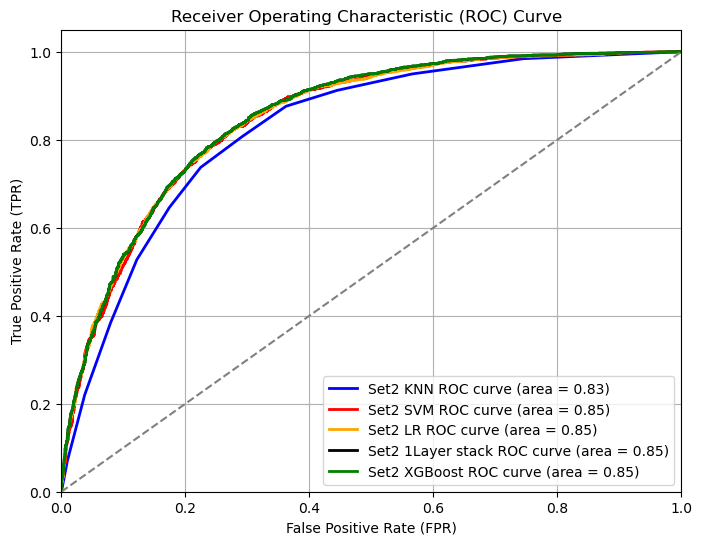

In [316]:
plt.figure(figsize=(8, 6))
plt.plot(fpr17, tpr17, color='blue', lw=2, label='Set2 KNN ROC curve (area = {:.2f})'.format(roc_auc17))
plt.plot(fpr2, tpr2, color='red', lw=2, label='Set2 SVM ROC curve (area = {:.2f})'.format(roc_auc2))
plt.plot(fpr40, tpr40, color='orange', lw=2, label='Set2 LR ROC curve (area = {:.2f})'.format(roc_auc40))
plt.plot(fpr50, tpr50, color='black', lw=2, label='Set2 1Layer stack ROC curve (area = {:.2f})'.format(roc_auc50))
plt.plot(fpr21, tpr21, color='green', lw=2, label='Set2 XGBoost ROC curve (area = {:.2f})'.format(roc_auc21))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve  ')
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

In [317]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Loading dataset

X=df_set2.drop(target,axis=1)
y=df_set2[target]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
input_dim = X_train.shape[1]
# Build the Feedforward Neural Network model

model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),  # Input layer
    keras.layers.Dense(64, activation='relu'),  # Hidden layer
    keras.layers.Dense(32, activation='relu'),  # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluatting the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Predictting probabilities on the test set
y_probs = model.predict(X_test)

# Converting probabilities to predicted classes
y_pred = [1 if prob > 0.45 else 0 for prob in y_probs]

# Calculating and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/10
775/775 [==============================] - 2s 2ms/step - loss: 0.5543 - accuracy: 0.7205
Epoch 2/10
775/775 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.7484
Epoch 3/10
775/775 [==============================] - 1s 2ms/step - loss: 0.5047 - accuracy: 0.7518
Epoch 4/10
775/775 [==============================] - 1s 2ms/step - loss: 0.5002 - accuracy: 0.7550
Epoch 5/10
775/775 [==============================] - 1s 2ms/step - loss: 0.4978 - accuracy: 0.7562
Epoch 6/10
775/775 [==============================] - 1s 2ms/step - loss: 0.4945 - accuracy: 0.7605
Epoch 7/10
775/775 [==============================] - 1s 2ms/step - loss: 0.4918 - accuracy: 0.7616
Epoch 8/10
775/775 [==============================] - 2s 2ms/step - loss: 0.4888 - accuracy: 0.7632
Epoch 9/10
775/775 [==============================] - 2s 2ms/step - loss: 0.4877 - accuracy: 0.7628
Epoch 10/10
194/194 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7630

In [318]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.


In [319]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Load and preprocess your dataset

X=df_set2.drop(target,axis=1)
y=df_set2[target]
# Replace 'input_dim' with the actual number of input features


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
input_dim = X_train.shape[1]
# Define the hyperparameter search space and build the model
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(10,)))

    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                                     activation='relu'))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Initializing the RandomSearch tuner
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=10,
                     directory='tuner_dir',
                     project_name='binary_classification')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]

# Rebuild the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hp)
best_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluating the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy of best model: {test_accuracy}")

# Predicting probabilities on the test set
y_probs = best_model.predict(X_test)

# Converting probabilities to predicted classes
y_pred = [1 if prob > 0.5 else 0 for prob in y_probs]

# Calculating and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


INFO:tensorflow:Reloading Tuner from tuner_dir\binary_classification\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
775/775 [==============================] - 4s 4ms/step - loss: 0.5545 - accuracy: 0.7196 - val_loss: 0.5410 - val_accuracy: 0.7310
Epoch 2/10
775/775 [==============================] - 3s 3ms/step - loss: 0.5099 - accuracy: 0.7484 - val_loss: 0.4961 - val_accuracy: 0.7557
Epoch 3/10
775/775 [==============================] - 3s 4ms/step - loss: 0.5007 - accuracy: 0.7511 - val_loss: 0.4909 - val_accuracy: 0.7612
Epoch 4/10
775/775 [==============================] - 3s 3ms/step - loss: 0.4955 - accuracy: 0.7591 - val_loss: 0.4835 - val_accuracy: 0.7609
Epoch 5/10
775/775 [==============================] - 3s 4ms/step - loss: 0.4927 - accuracy: 0.7628 - val_loss: 0.4884 - val_accuracy: 0.7593
Epoch 6/10
775/775 [==============================] - 3s 4ms/step - loss: 0.4887 - accuracy: 0.7639 - val_loss: 0.4852 - val_accuracy: 0.7638
Epoch 7/10
775/775 [=========